## Lending Club Case Study

### Problem Statement
The objective of this case study is to perform exploratory data analysis (EDA) to identify patterns and understand how consumer attributes and loan attributes influence the tendency of loan default. The aim is to identify the variables that can help predict whether an applicant is likely to default or not. This information can be used by the consumer finance company to make loan approval decisions and mitigate the risk of financial loss due to defaults.


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) 

In [2]:
#reading the loan data set
loan_df = pd.read_csv('loan.csv')

In [3]:
#checking the shape of the data set
loan_df.shape

(39717, 111)

In [4]:
#checking the first 5 rows of the data set
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
#checking the info of the data set
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
#checking the summary of the data set
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Data Cleaning

#### Missing Value Treatment
We will first check the percentage of missing values in each column. If the percentage of missing values is more than 25%, we will drop the column. 

In [7]:
#calculating the percentage of null values in each column
loan_df.isnull().sum()/loan_df.shape[0]*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [8]:
#extacting the columns with more than 25% null values
null_columns = loan_df.columns[(loan_df.isnull().sum()/loan_df.shape[0]*100) > 25 ]

#checking the number of columns with more than 50% null values
len(null_columns)

58

In [9]:
#dropping the columns with more than 25% null values
loan_df.drop(null_columns, axis=1, inplace=True)

In [10]:
#checking the shape of the data set after dropping the columns
loan_df.shape

(39717, 53)

In [11]:
#checking the info of the data set after dropping the columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [12]:
#checking the columns that has null values and the number of null values in each column
loan_df.isnull().sum()[loan_df.isnull().sum() > 0]

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64

We will take care of rest of the missing values after removing the irrelevant columns and duplicate rows.

#### Removing irrelevant columns and rows
Columns like 'id', 'member_id', 'url', 'title', 'emp_title', 'zip_code' are irrelevant for the analysis and hence removed.  

In [13]:
#removing the columns which are not required for the analysis
loan_df.drop(['id','member_id','url','title', 'emp_title', 'zip_code'],axis=1,inplace=True)

Records with 'Current' status are removed as we cannot determine whether they will default or not.

In [14]:
#dropping the rows with 'Current'as the loan status
loan_df = loan_df[loan_df['loan_status'].isin(['Fully Paid','Charged Off'])]

Columns with one unique value are removed as they do not add any value to the analysis.

In [15]:
#extracting the columns with only one unique value,
single_value_column =  list(loan_df.nunique()[loan_df.nunique() == 1].keys())
single_value_column

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [16]:
#dropping the columns with only one unique value
loan_df.drop(single_value_column, axis = 1, inplace = True)

In [17]:
#checking the shape of the data set
loan_df.shape

(38577, 36)

In [18]:
#checking the summary of the data set
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               37544 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  purpose               

Customer behaviour variables like 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d' are also removed as they are not available at the time of loan application.

In [19]:
#removing the customer behaviour columns
loan_df.drop(['last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','collection_recovery_fee','recoveries','total_rec_late_fee','total_rec_int','total_rec_prncp','total_pymnt_inv','total_pymnt','total_acc','revol_bal','open_acc','inq_last_6mths','delinq_2yrs','earliest_cr_line'], axis = 1, inplace = True)

In [20]:
#checking the shape of the data set
loan_df.shape

(38577, 20)

#### Removing duplicate rows

In [21]:
#dropping duplicate rows
loan_df.drop_duplicates(inplace=True)

In [22]:
#checking the shape of the data set
loan_df.shape

(38577, 20)

There is no duplicate row in the dataset.

#### Imputing missing values

In [23]:
#checking the columns that have number of null values greater than 0
loan_df.isnull().sum()[loan_df.isnull().sum() > 0]

emp_length              1033
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

In [24]:
#checking the value counts of the column 'emp_length'
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

We will impute the missing values in the following columns with the mode of the column as they will not affect the analysis. 
10+ years  for 'emp_length' and 0 for 'revol_util' columns.

In [25]:
#Imputing the null values in the column 'emp_length' with the mode value
loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0], inplace=True)

In [26]:
#checking the value counts of pub_rec_bankruptcies
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [27]:
#Imputing the null values in the column 'pub_rec_bankruptcies' with the mode value
loan_df['pub_rec_bankruptcies'].fillna(loan_df['pub_rec_bankruptcies'].mode()[0], inplace=True)

#### Data Transformation and Formatting

Changing the datatype of 'int_rate' column from object to int.

In [28]:
#checking the value counts of int_rate column
loan_df['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [29]:
#removing the % sign from the int_rate column and converting it to float
loan_df['int_rate'] = loan_df['int_rate'].str.replace('%','').astype(float)

In [30]:
#checking the value counts of int_rate column
loan_df['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

Converting 'revol_util' column to float

In [31]:
#checking the value counts of revol_util column
loan_df['revol_util'].value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

In [32]:
#removing the % sign from the revol_util column and converting it to float
loan_df['revol_util'] = loan_df['revol_util'].str.replace('%','').astype(float)

In [33]:
#diplaying the first 5 rows of the revol_util column
loan_df['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

In [34]:
#converting the emp_length column to int wtih 0 for < 1 and 10 for 10+ years
loan_df['emp_length'] = loan_df['emp_length'].apply (lambda x : np.nan if pd.isnull(x) else 0 if x == 0 else int(x.rstrip(' years').replace(' year','').replace('10+','10').replace('< 1','0')))

In [35]:
#checking the value counts of emp_length column
loan_df['emp_length'].value_counts()

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

Converting 'issue_d' column to datetime format

In [36]:
#converting the issue_d column to datetime format
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

In [37]:
#checking the first 5 rows of the issue_d column
loan_df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

<Axes: >

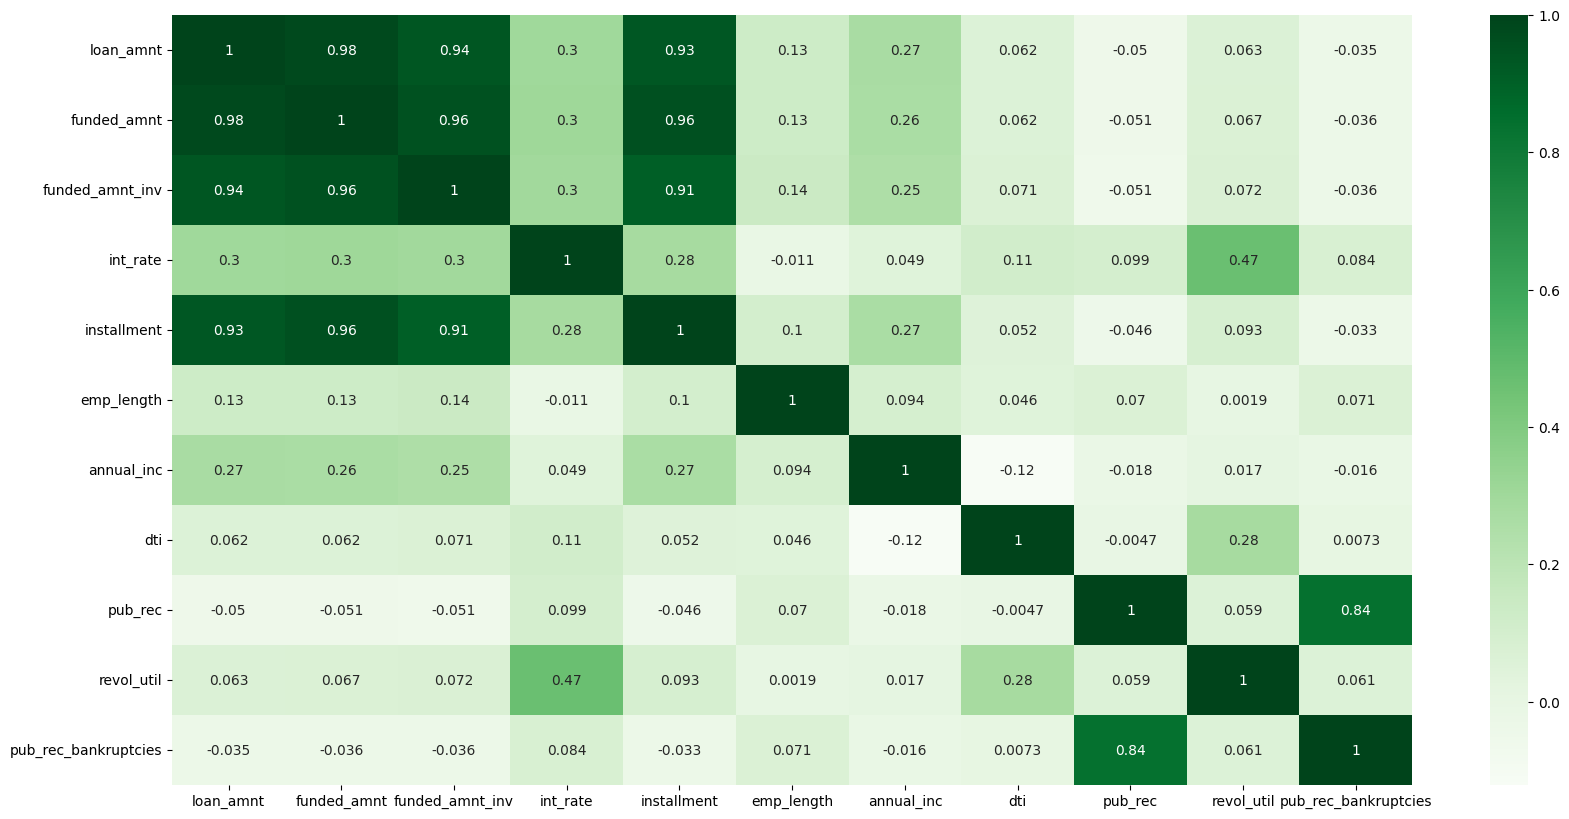

In [38]:
#checking the correlation between the columns
plt.figure(figsize=(20,10))
sns.heatmap(loan_df.corr(), annot=True, cmap='Greens')

In [39]:
#dropping the columns with high correlation
loan_df.drop(['funded_amnt','funded_amnt_inv','installment','pub_rec'],axis=1,inplace=True)

In [40]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   term                  38577 non-null  object        
 2   int_rate              38577 non-null  float64       
 3   grade                 38577 non-null  object        
 4   sub_grade             38577 non-null  object        
 5   emp_length            38577 non-null  int64         
 6   home_ownership        38577 non-null  object        
 7   annual_inc            38577 non-null  float64       
 8   verification_status   38577 non-null  object        
 9   issue_d               38577 non-null  datetime64[ns]
 10  loan_status           38577 non-null  object        
 11  purpose               38577 non-null  object        
 12  addr_state            38577 non-null  object        
 13  dti             

#### Derived Metrics


Adding new columns 'issue_year' and 'issue_month' to the dataset

In [41]:
#Adding new column 'issue_year' to the data set
loan_df['issue_year'] = loan_df['issue_d'].dt.year

#Adding new column 'issue_month' to the data set
loan_df['issue_month'] = loan_df['issue_d'].dt.month

#### Data Understanding

Numerical Variables:  
    'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util'

Categorical Variables:  
    'term', 'emp_length', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'pub_rec_bankruptcies', 'issue_d', 'issue_year', 'issue_month'

Target Variable:  
    'loan_status'

In [42]:
#categorical columns
cat_cols = ['term', 'emp_length', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'pub_rec_bankruptcies' ,'addr_state', 'issue_d', 'issue_year', 'issue_month']

#numerical columns
num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util']

In [43]:
loan_df[num_cols].describe()

,loan_amnt,int_rate,annual_inc,dti,revol_util
count,38577.000000,38577.000000,3.857700e+04,38577.000000,38527.000000
mean,11047.025430,11.932219,6.877797e+04,13.272727,48.702777
std,7348.441646,3.691327,6.421868e+04,6.673044,28.364741
min,500.000000,5.420000,4.000000e+03,0.000000,0.000000
25%,5300.000000,8.940000,4.000000e+04,8.130000,25.200000
50%,9600.000000,11.710000,5.886800e+04,13.370000,49.100000
75%,15000.000000,14.380000,8.200000e+04,18.560000,72.300000
max,35000.000000,24.400000,6.000000e+06,29.990000,99.900000


In [44]:
loan_df[cat_cols].describe(include = 'object')

,term,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,addr_state
count,38577,38577,38577,38577,38577,38577,38577,38577
unique,2,7,35,5,3,2,14,50
top,36 months,B,A4,RENT,Not Verified,Fully Paid,debt_consolidation,CA
freq,29096,11675,2873,18480,16694,32950,18055,6949


### Univariate Analysis

In [45]:
#Analyzing target variable 'loan_status' by calculating the percentage of each category
(loan_df['loan_status'].value_counts()/len(loan_df))*100

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

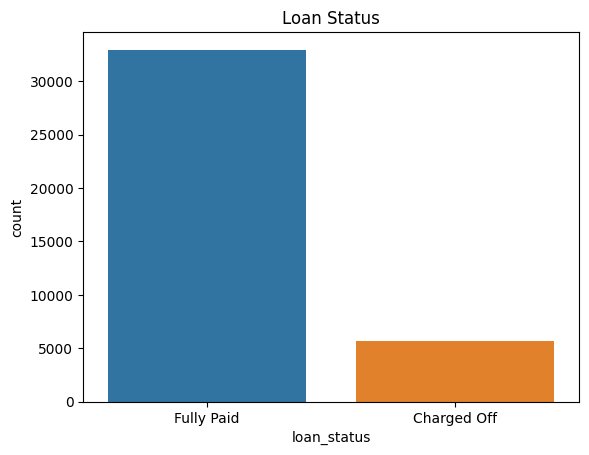

In [46]:
#plotting the target variable 'loan_status'
sns.countplot(x='loan_status',data=loan_df)
plt.title('Loan Status')
plt.show()

Observation : Out of 38577 records, 85.4% records have loan_status as 'Fully Paid' and 14.6% records have loan_status as 'Charged Off'. This indicates that most of the loans are paid back in full.

#### Univarite Analysis of Numerical Variables

1. Loan Amount

In [47]:
#summary of loan amount
loan_df['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

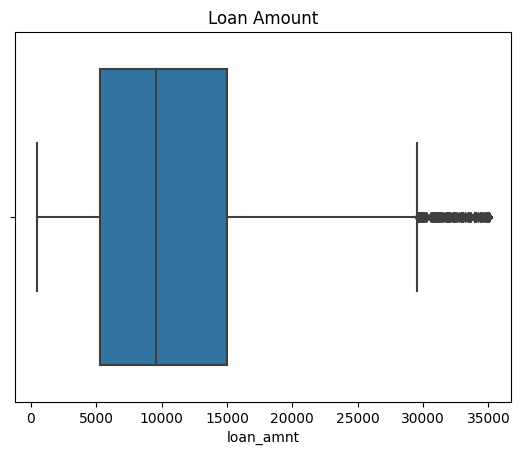

In [48]:
#plotting the box plot for loan amount
sns.boxplot(x='loan_amnt',data=loan_df)
plt.title('Loan Amount')
plt.show()

Observation : The loan amount has mean value of 11047.02 and median value of 9600.00. The distribution of loan amount is right skewed i.e. highly skewed towards lower values. The maximum loan amount is 35000.00 and minimum loan amount is 500.00. 

2. Interest Rate

In [49]:
#Summary of interest rate
loan_df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

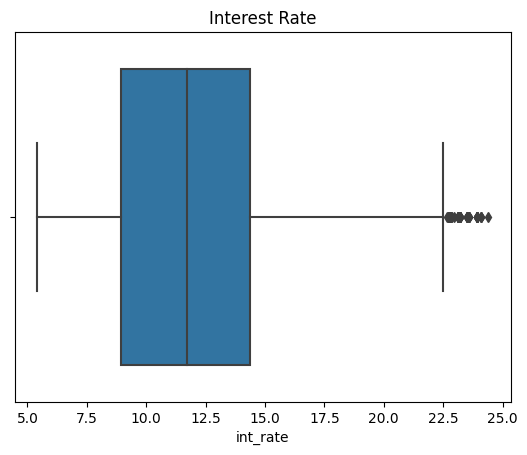

In [50]:
#box plot for interest rate
sns.boxplot(x='int_rate',data=loan_df)
plt.title('Interest Rate')
plt.show()

Observation: The interest rate is between 5.42% and 24.40% with mean value of 11.93% and median value of 11.71%. 

3. Annual Income

In [51]:
#summary of annual income
loan_df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

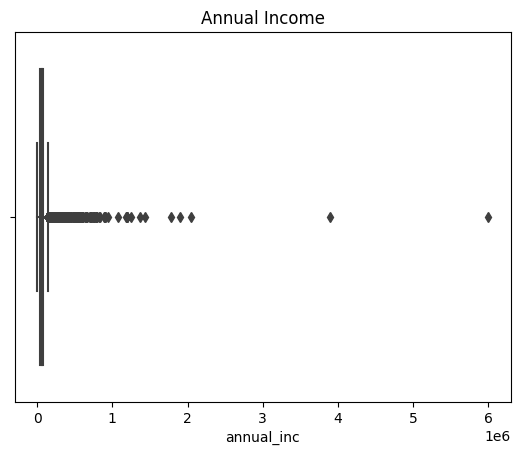

In [52]:
#box plot for annual income
sns.boxplot(x='annual_inc',data=loan_df)
plt.title('Annual Income')
plt.show()

From the above plot, it is evident that outliers are present in the annual income column. We will remove the outliers and plot the distribution again.

In [53]:
#checking the quantiles of annual income
loan_df['annual_inc'].quantile([0.25,0.5,0.75,0.95,0.99])

0.25     40000.0
0.50     58868.0
0.75     82000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [54]:
#removing the outliers from the annual income column above the 99th quantile
loan_df = loan_df[loan_df['annual_inc'] < loan_df['annual_inc'].quantile(0.99)]

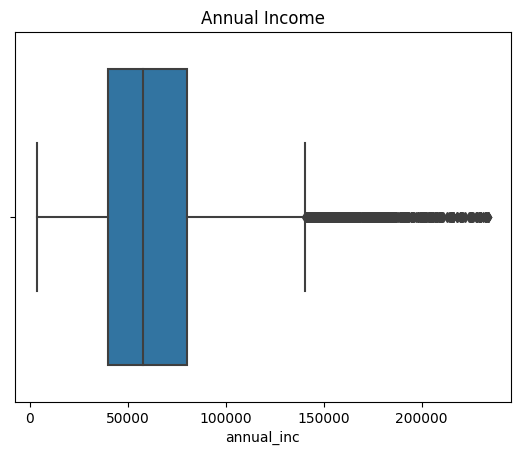

In [55]:
#box plot for annual income
sns.boxplot(x='annual_inc',data=loan_df)
plt.title('Annual Income')
plt.show()

Observation : About 75% of the data has annual income of upto $82000.00. 

4. Debt to Income Ratio

In [56]:
#summary of dti
loan_df['dti'].describe()

count    38191.000000
mean        13.333491
std          6.657843
min          0.000000
25%          8.210000
50%         13.430000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

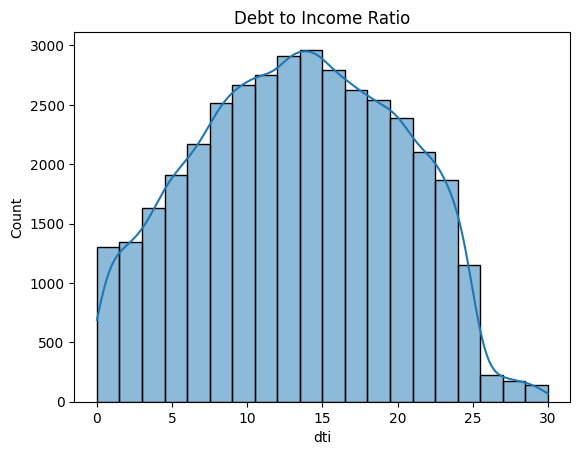

In [57]:
#histogram for dti
sns.histplot(loan_df['dti'], kde=True, bins=20)
plt.title('Debt to Income Ratio')
plt.show()

Observation : The debt to income ratio is between 0.00% and 29.99% with mean value of 13.33% and median value of 13.43%. Lower debt to income ratio indicates higher creditworthiness of the borrower.

5. Revolving Utilization

In [58]:
#checking the summary of revol_util
loan_df['revol_util'].describe()

count    38142.000000
mean        48.692548
std         28.336023
min          0.000000
25%         25.200000
50%         49.100000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64

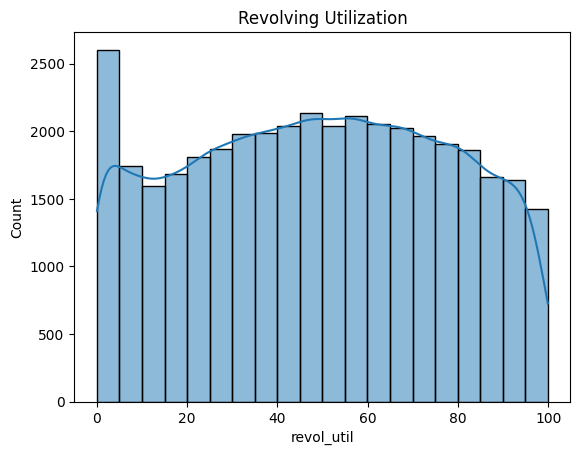

In [59]:
#histogram for revol_util
sns.histplot(loan_df['revol_util'], kde=True, bins=20)
plt.title('Revolving Utilization')
plt.show()

Observation : The mean value of revol_util is 48.69, indicating that on average, borrowers are utilizing roughly half of their available revolving credit. it varies widely across the borrower population and may have implications for their ability to repay their debts.

### Univariate Analysis of Categorical Variables

1.  Term

In [60]:
#checking the percentage of each category in the term column
(loan_df['term'].value_counts()/len(loan_df))*100

 36 months    75.460187
 60 months    24.539813
Name: term, dtype: float64

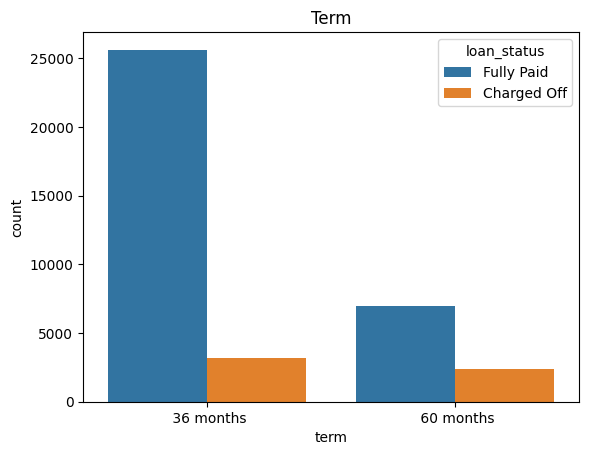

In [61]:
#plotting the count plot for term
sns.countplot(x='term', hue = 'loan_status', data=loan_df)
plt.title('Term')
plt.show()

Observation : Borrowers have taken loan for 36 months in 75.46% of the cases and for 60 months in 24.54% of the cases. Also charge off rate is higher for 60 months term loans.

2. Home Ownership

In [62]:
#checking the value counts of home_ownership column
loan_df['home_ownership'].value_counts()

RENT        18397
MORTGAGE    16748
OWN          2947
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

We have 3 columns with None value. We will replace None with Other.

In [63]:
#replace the NONE value with OTHER
loan_df['home_ownership'] = loan_df['home_ownership'].replace('NONE','OTHER')

In [64]:
#checking the value counts of home_ownership column
loan_df['home_ownership'].value_counts()

RENT        18397
MORTGAGE    16748
OWN          2947
OTHER          99
Name: home_ownership, dtype: int64

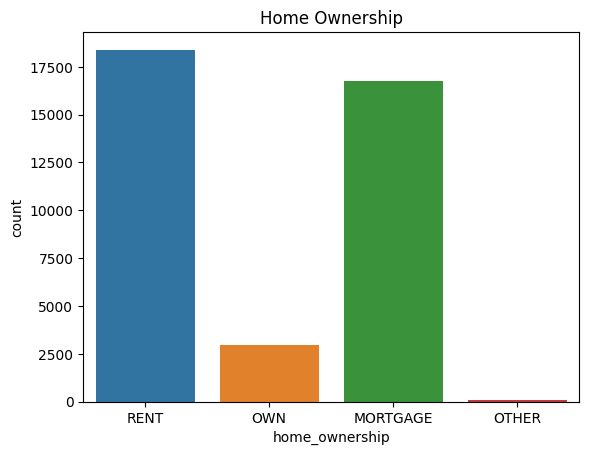

In [65]:
#plotting the count plot for home_ownership
sns.countplot(x='home_ownership' , data=loan_df)
plt.title('Home Ownership')
plt.show()

Observation : Most of the borrowers have rent or Moragage as their home ownership type.

3. Purpose

In [66]:
#checking the value counts of purpose column
loan_df['purpose'].value_counts()

debt_consolidation    17917
credit_card            4987
other                  3831
home_improvement       2797
major_purchase         2129
small_business         1723
car                    1491
wedding                 917
medical                 674
moving                  570
vacation                375
house                   357
educational             323
renewable_energy        100
Name: purpose, dtype: int64

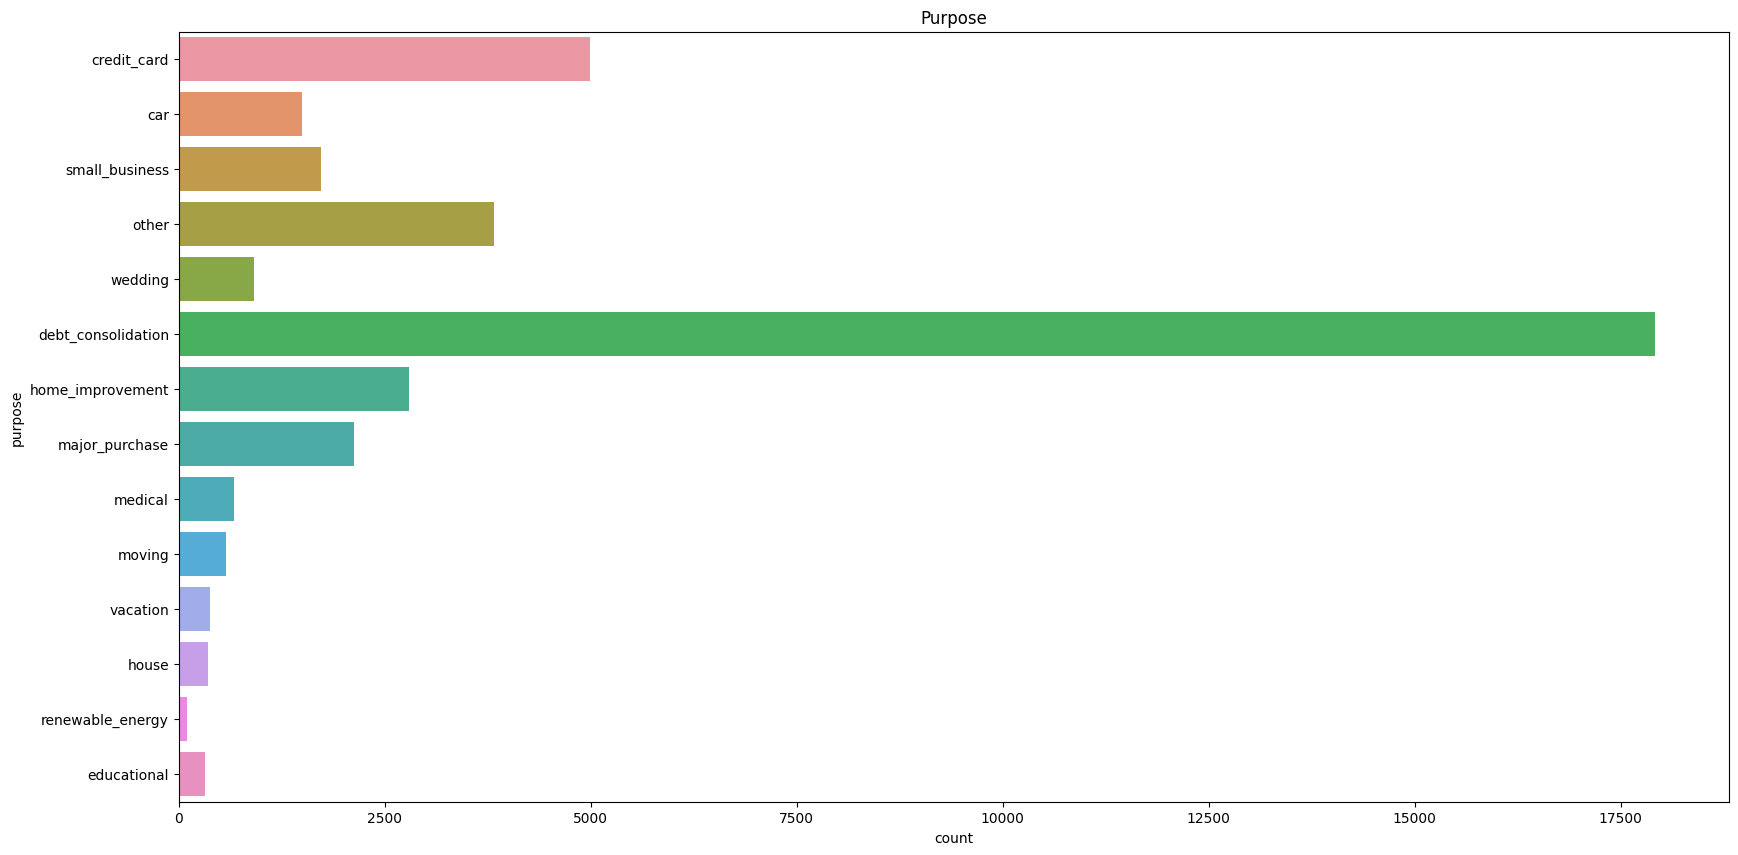

In [67]:
#plotting the count plot for purpose
plt.figure(figsize=(20,10))
sns.countplot(y='purpose', data=loan_df)
plt.title('Purpose')
plt.show()

Observation : Most of the borrowers have taken loan for debt consolidation purpose followed by credit card.

4. issue_d

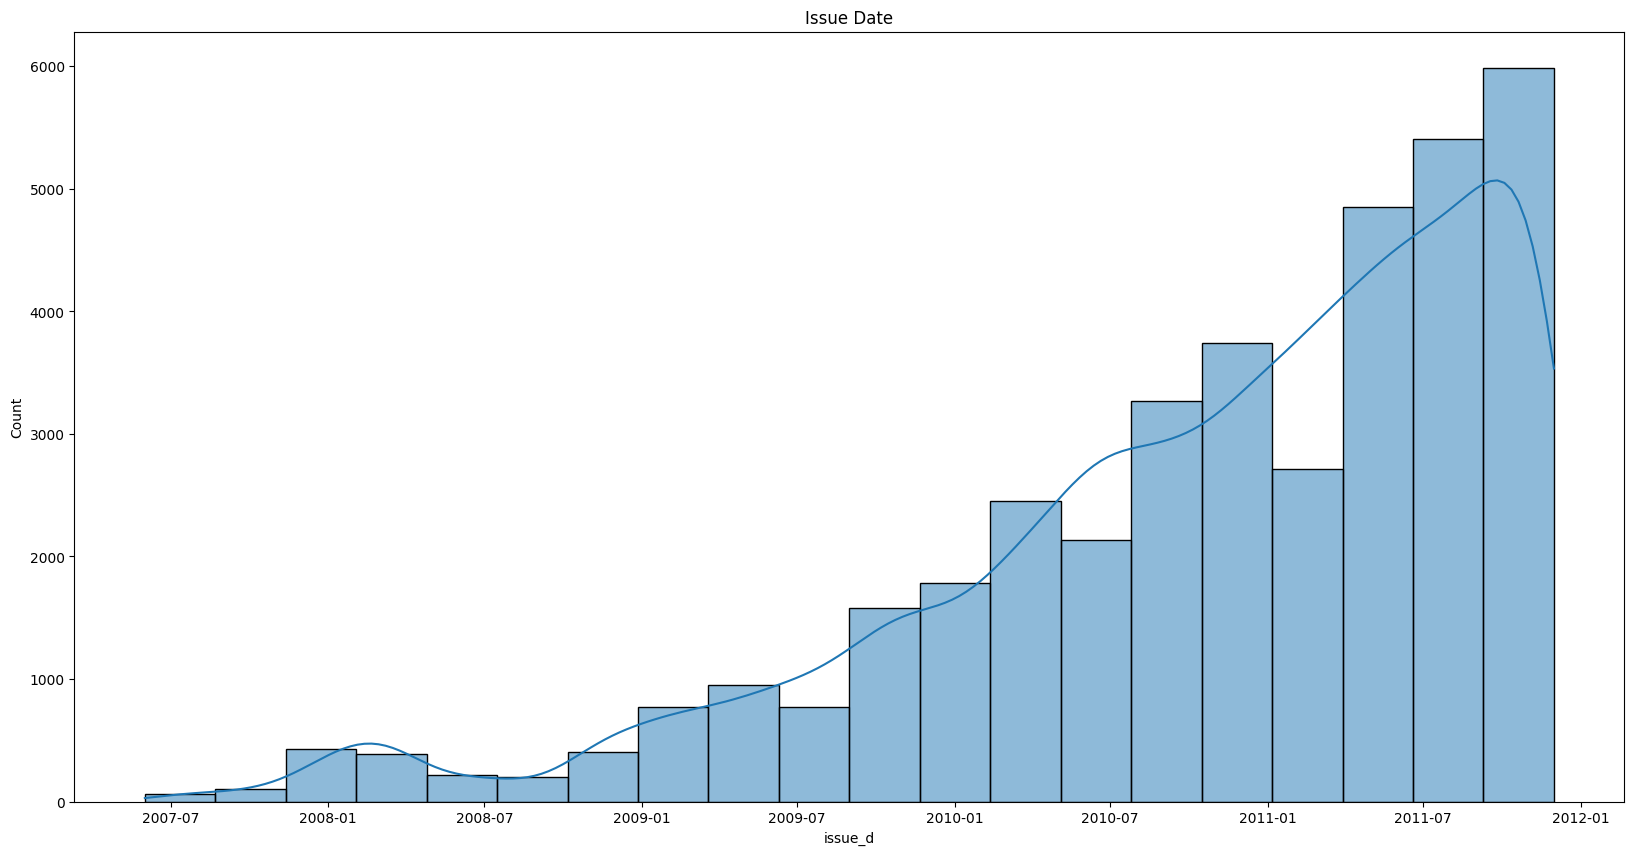

In [68]:
#plotting the histogram for issue_d
plt.figure(figsize=(20,10))
sns.histplot(x='issue_d', data=loan_df, kde=True, bins=20)
plt.title('Issue Date')
plt.show()

Observation : The count of loans issued keeps increasing over the years indicating that the company is growing.

5. pub_rec_bankruptcies

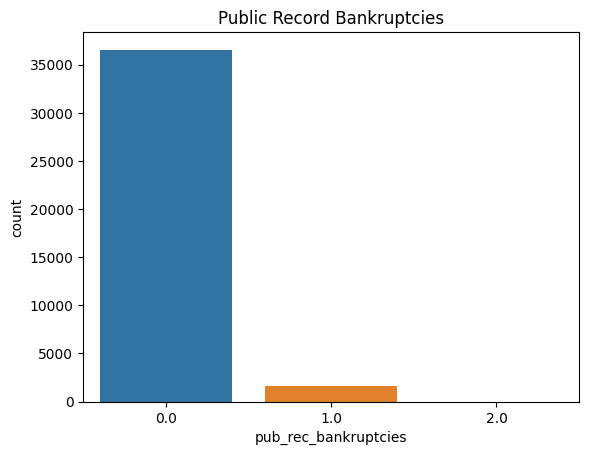

In [69]:
#plotting the count plot for pub_rec_bankruptcies
sns.countplot(x='pub_rec_bankruptcies', data=loan_df)
plt.title('Public Record Bankruptcies')
plt.show()

Observation : Most of the borrowers have 0 public record bankruptcies.

### Bivariate Analysis

Creating the buckets for loan amount, annual income, interest rate, debt to income ratio and revolving utilization for better bivariate analysis.


In [70]:
#creating bins for loan amount
loan_df['loan_amnt_bin'] = pd.cut(loan_df['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5K', '5K-10K', '10K-15K', '15K-20K', '20K-25K', '25K-30K', '30K-35K'])

#creating bins for annual income
loan_df['annual_inc_bin'] = pd.cut(loan_df['annual_inc'], bins=[0, 30000, 60000, 90000, 120000, 150000, 180000, 210000, 240000], labels=['0-30K', '30K-60K', '60K-90K', '90K-120K', '120K-150K', '150K-180K', '180K-210K', '210K-240K'])

#creating bins for interest rate
loan_df['int_rate_bin'] = pd.cut(loan_df['int_rate'], bins=[5, 10, 15, 20, 25], labels=['5-10%', '10-15%', '15-20%', '20-25%'])

#creating bins for dti
loan_df['dti_bin'] = pd.cut(loan_df['dti'], bins=[0, 5, 10, 15, 20, 25, 30], labels=['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%'])

#creating bins for revol_util
loan_df['revol_util_bin'] = pd.cut(loan_df['revol_util'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

Loan Amount vs Interest Rate

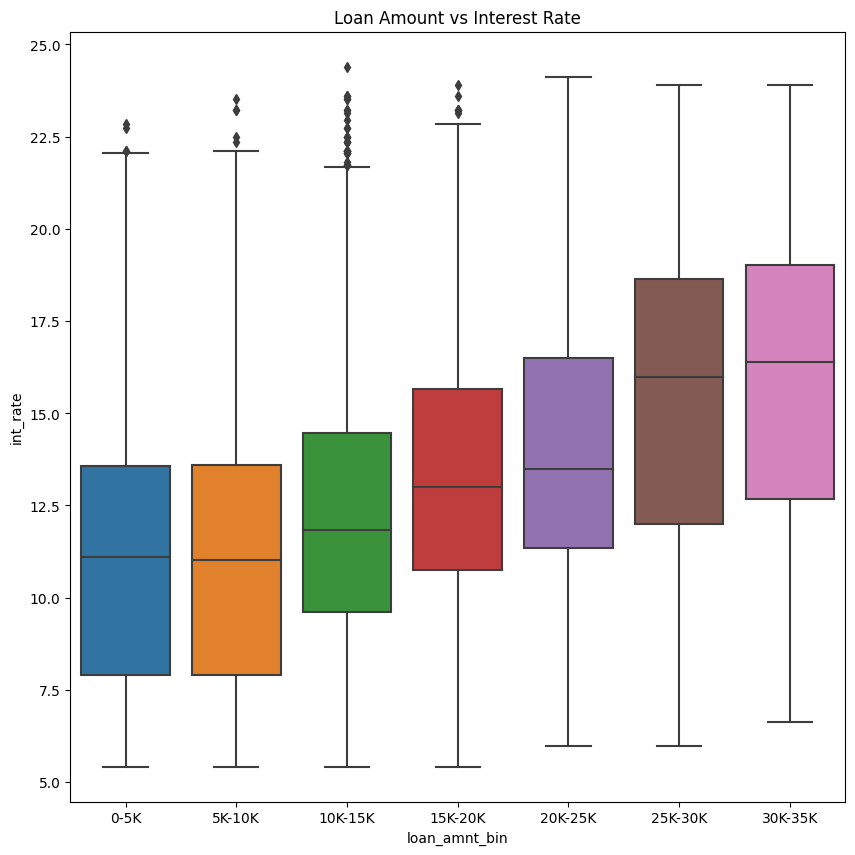

In [71]:
#ploting box plot for loan amount bin and interest rate
plt.figure(figsize=(10,10))
sns.boxplot(x='loan_amnt_bin', y='int_rate', data=loan_df)
plt.title('Loan Amount vs Interest Rate')
plt.show()

Observation : As loan amount increases, interest rate also increases. 

Term vs Interest Rate

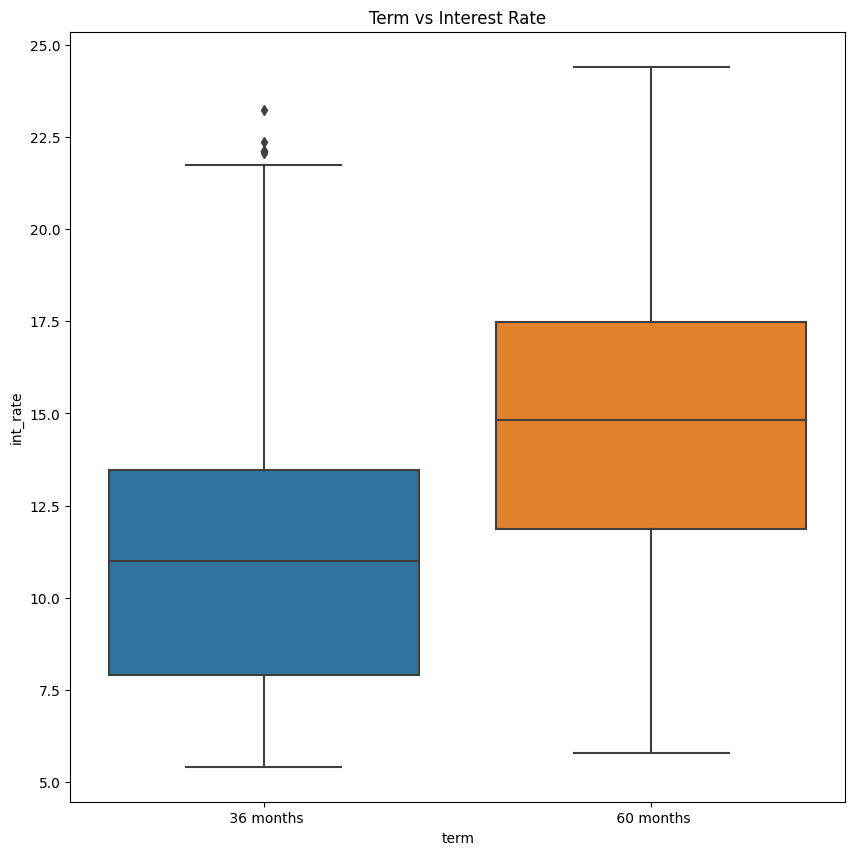

In [72]:
#plotting the box plot for Term and Interest Rate
plt.figure(figsize=(10,10))
sns.boxplot(x='term', y='int_rate', data=loan_df)
plt.title('Term vs Interest Rate')
plt.show()

Observation : The interest rate is higher for the 60 months term than the 36 months term.

Verification Status vs loan amount

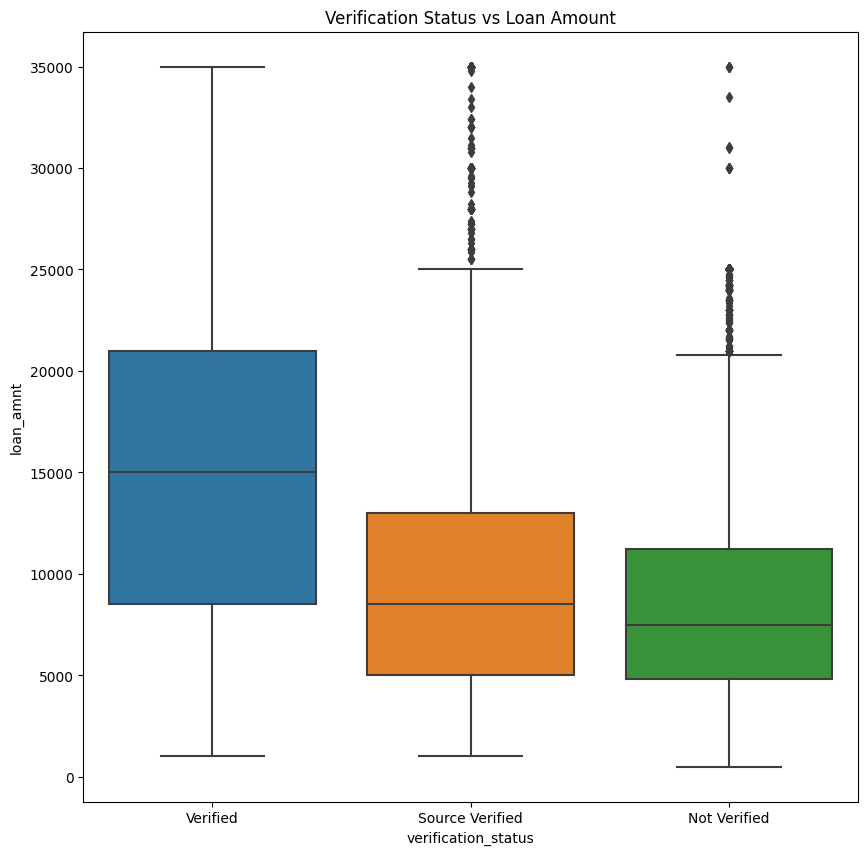

In [73]:
#plotting the box plot for verification status and loan amount
plt.figure(figsize=(10,10))
sns.boxplot(x='verification_status', y='loan_amnt', data=loan_df)
plt.title('Verification Status vs Loan Amount')
plt.show()

Observation : The loan amount is higher for verified borrowers than for non verified borrowers.

Interest Rate vs Grade

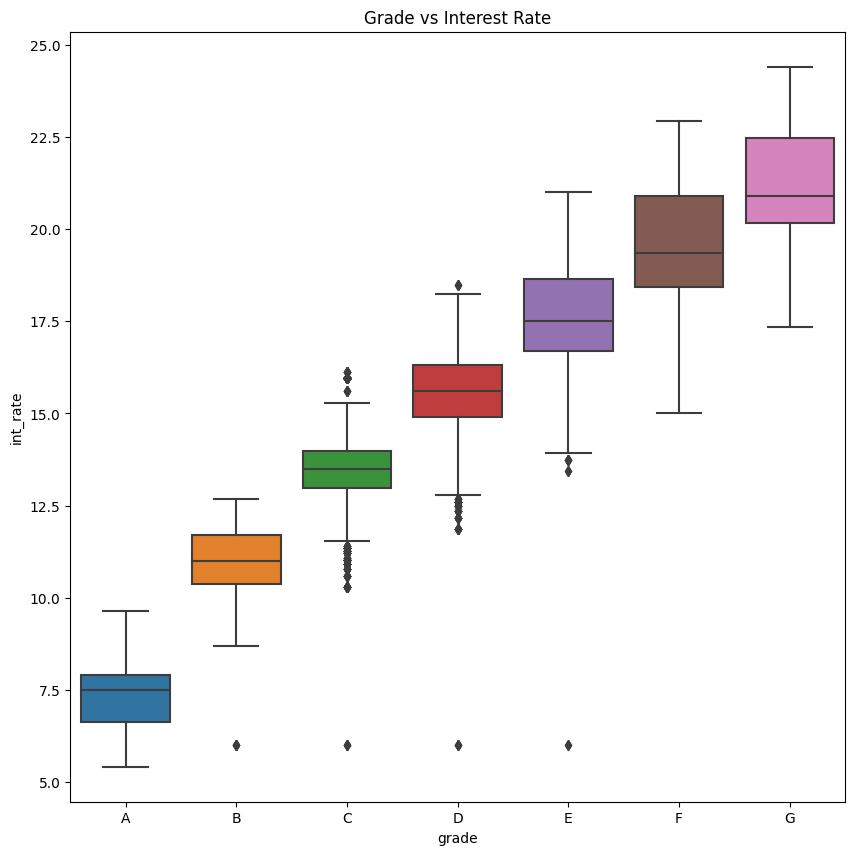

In [74]:
#plotting the box plot for interest rate and Grade
plt.figure(figsize=(10,10))
sns.boxplot(x='grade', y='int_rate', data=loan_df, order=['A','B','C','D','E','F','G'])
plt.title('Grade vs Interest Rate')
plt.show()

Observatoin : As the grade of the loan increases from A to G, the range of interest rate also increases. This implies grade is dependent on interest rate.

Debt to Income Ratio vs Interest Rate

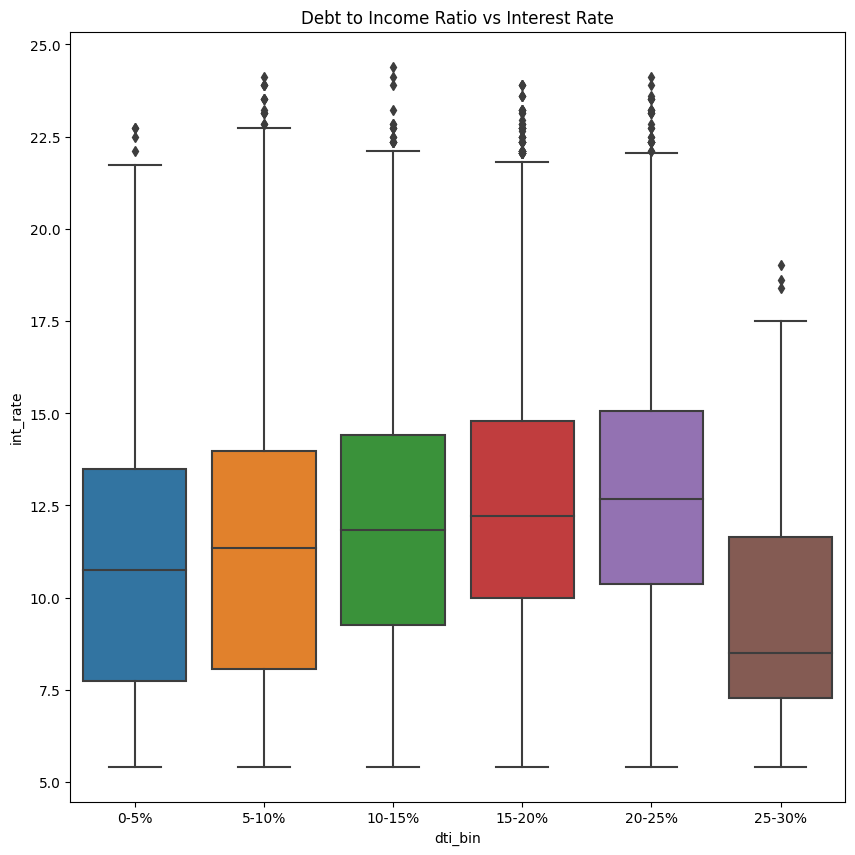

In [75]:
#plotting the box plot for debt to income ratio and interest rate
plt.figure(figsize=(10,10))
sns.boxplot(x='dti_bin', y='int_rate', data=loan_df)
plt.title('Debt to Income Ratio vs Interest Rate')
plt.show()

In [76]:
#checking the summary of interest having dti of 25-30% range
loan_df[loan_df['dti_bin'] == '25-30%']['loan_amnt_bin'].value_counts()

5K-10K     197
0-5K       122
10K-15K    120
15K-20K     90
20K-25K     48
25K-30K     27
30K-35K     18
Name: loan_amnt_bin, dtype: int64

Observation : As the debt to income ratio increases, the interest rate also increases. As seen in loan amount vs interest rate plot, the interest rate is higher for higher loan amount. This implies that the interest rate is dependent on loan amount. Since the borrowers with 25-30% debt to income ratio have majorly taken loan of upto 15K, the mean value of interest rate is lower than the borrowers with 20-25% debt to income ratio.

Term vs Loan amount

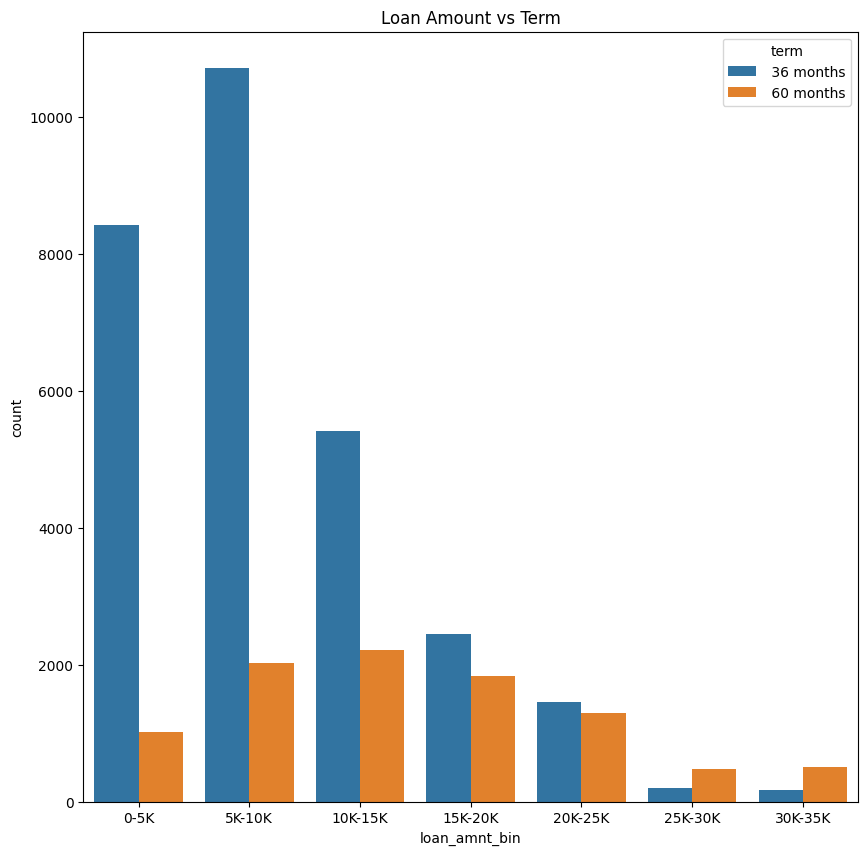

In [77]:
#plotting the count plot for loan amount bin and Term
plt.figure(figsize=(10,10))
sns.countplot(x='loan_amnt_bin', hue='term', data=loan_df)
plt.title('Loan Amount vs Term')
plt.show()

Observation : The lower loan amount likely to be taken for term of 36 months and higher loan amount likely to be taken for term of 60 months.

Purpose vs Loan amount

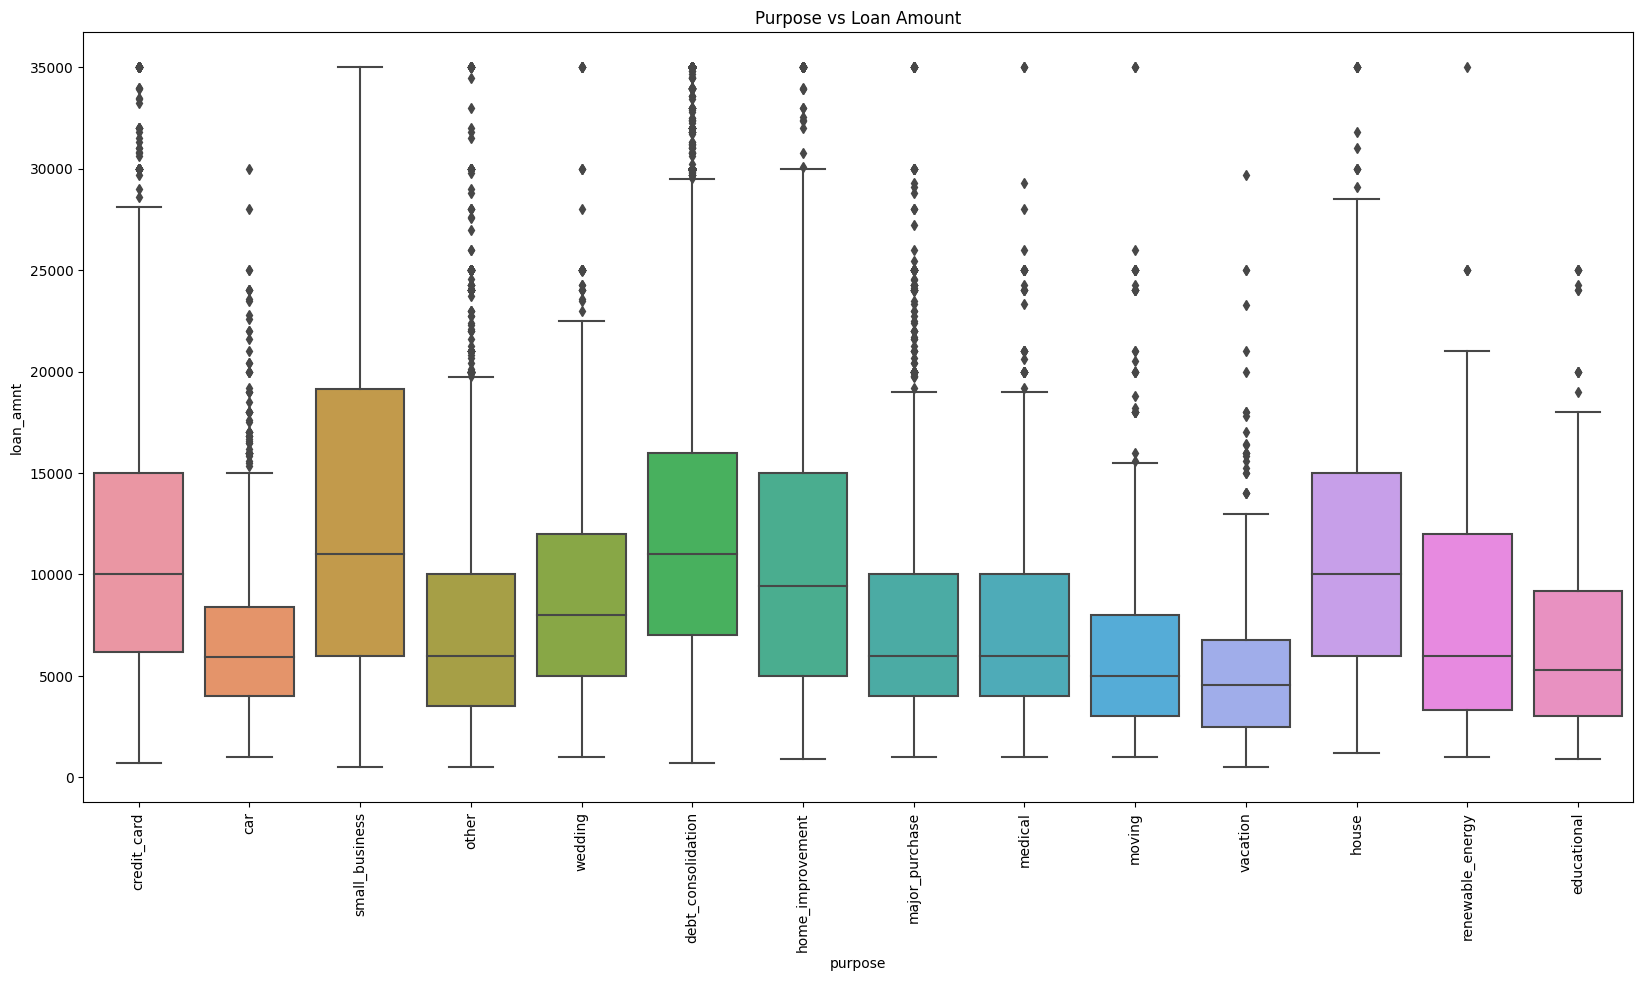

In [78]:
#plotting the box plot for purpose and loan amount
plt.figure(figsize=(20,10))
sns.boxplot(x='purpose', y='loan_amnt', data=loan_df)
plt.title('Purpose vs Loan Amount')
plt.xticks(rotation=90)
plt.show()

Observation : The loan amount is higher for the purpose of small business followed by debt consolidation and credit card.

Purpose vs Interest Rate

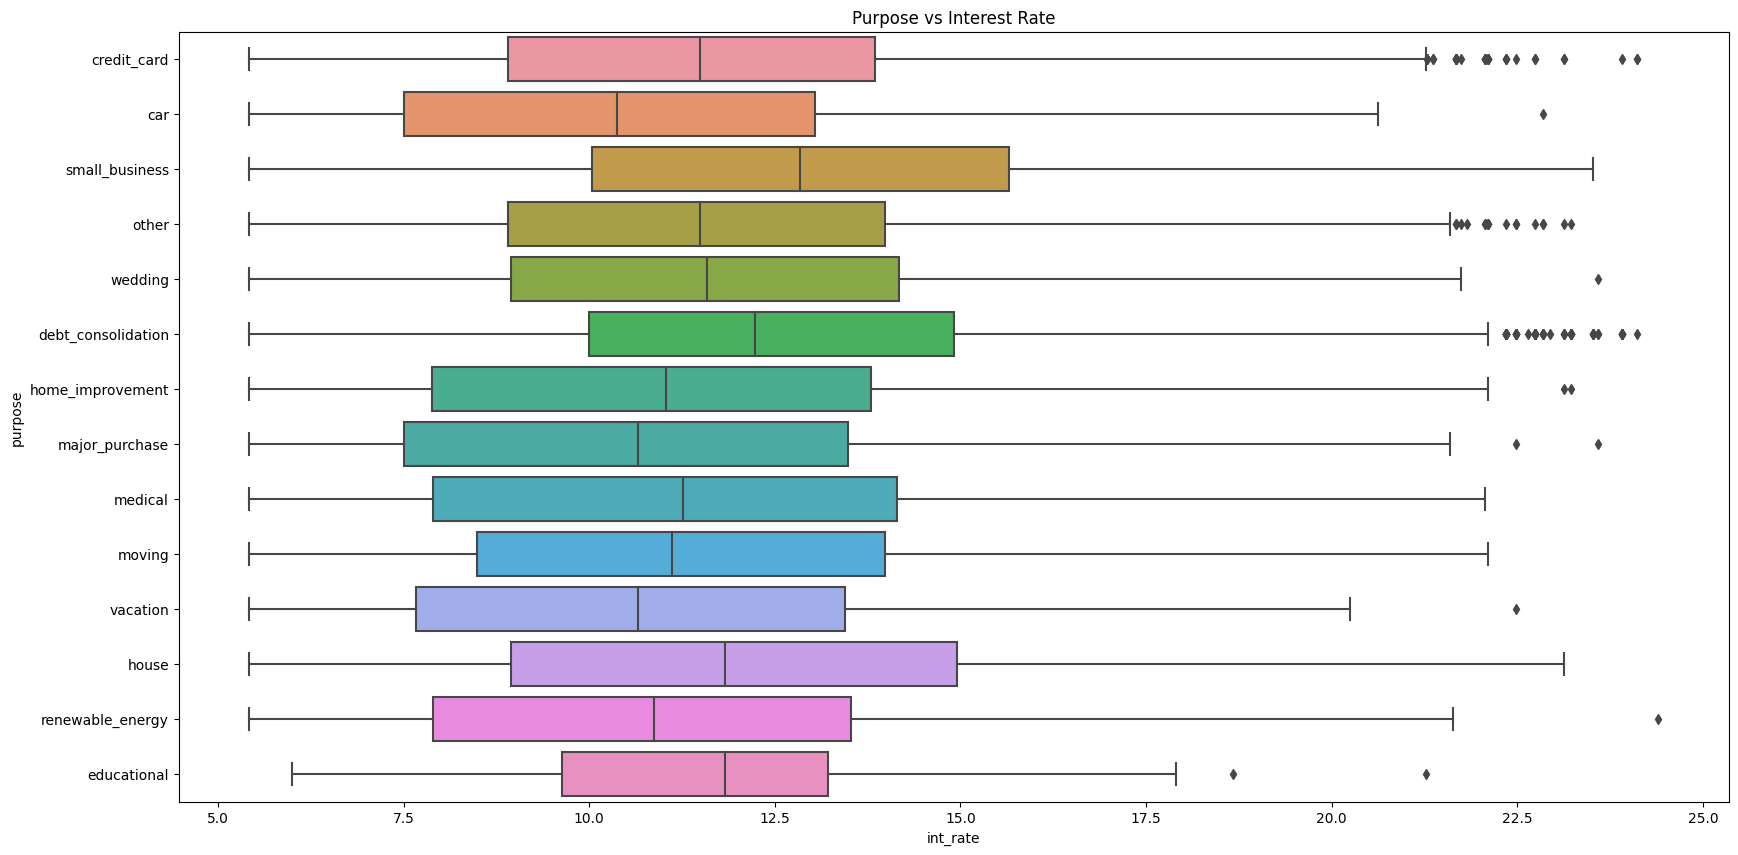

In [79]:
#plotting the box plot for purpose and interest rate
plt.figure(figsize=(20,10))
sns.boxplot(y='purpose', x='int_rate', data=loan_df)
plt.title('Purpose vs Interest Rate')
plt.show()

Observation: The average interest rate is higher for the purpose of small business followed by debt consolidation. Also the small business tend to have higher interest rate than the other purposes. The higher ceiling of interest rate for small business is due to the higher risk associated with it.

#### Bivariate Analysis with Target Variable - loan_status

Loan Amount vs Loan Status

In [80]:
#creating pivot table for loan status and loan amount bin
status_vs_amount_pivot = pd.pivot_table(loan_df, index='loan_amnt_bin',columns='loan_status', values='loan_amnt', aggfunc='count')

#adding the column for total
status_vs_amount_pivot['total'] = status_vs_amount_pivot['Charged Off'] + status_vs_amount_pivot['Fully Paid']

#adding the percentage of charged off and fully paid
status_vs_amount_pivot['charged_off_percentage'] = (status_vs_amount_pivot['Charged Off']/status_vs_amount_pivot['total'])*100
status_vs_amount_pivot['fully_paid_percentage'] = (status_vs_amount_pivot['Fully Paid']/status_vs_amount_pivot['total'])*100

status_vs_amount_pivot

loan_status,Charged Off,Fully Paid,total,charged_off_percentage,fully_paid_percentage
loan_amnt_bin,,,,,
0-5K,1310,8126,9436,13.883001,86.116999
5K-10K,1637,11100,12737,12.852320,87.147680
10K-15K,1050,6580,7630,13.761468,86.238532
15K-20K,743,3549,4292,17.311277,82.688723
20K-25K,530,2223,2753,19.251725,80.748275
25K-30K,141,530,671,21.013413,78.986587
30K-35K,173,499,672,25.744048,74.255952


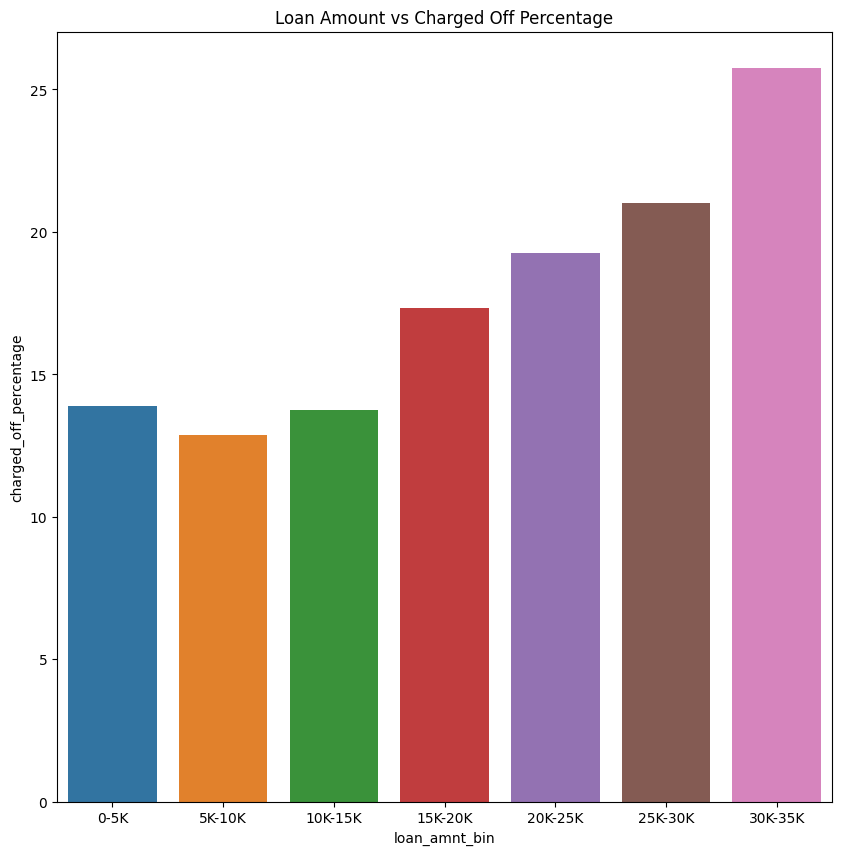

In [81]:
#plotting the bar plot for loan amount bin and charged off percentage
plt.figure(figsize=(10,10))
sns.barplot(x = status_vs_amount_pivot.index, y = status_vs_amount_pivot['charged_off_percentage'])
plt.title('Loan Amount vs Charged Off Percentage')
plt.show()

Observation : The charged off percentage increases for loan amount above 15K-20K and beyond. Specifically, borrowers who take out higher loan amounts are more likely to default on their loans and less likely to pay them off in full. 

Annual Income vs Loan Status

In [82]:
#creating pivot table for loan status and annual income bin
status_vs_income_pivot = loan_df.pivot_table(index='annual_inc_bin', columns='loan_status', values='annual_inc', aggfunc='count')

#adding the column for total
status_vs_income_pivot['total'] = status_vs_income_pivot['Charged Off'] + status_vs_income_pivot['Fully Paid']

#adding the percentage of charged off and fully paid
status_vs_income_pivot['charged_off_percentage'] = (status_vs_income_pivot['Charged Off']/status_vs_income_pivot['total'])*100
status_vs_income_pivot['fully_paid_percentage'] = (status_vs_income_pivot['Fully Paid']/status_vs_income_pivot['total'])*100

status_vs_income_pivot

loan_status,Charged Off,Fully Paid,total,charged_off_percentage,fully_paid_percentage
annual_inc_bin,,,,,
0-30K,839,3712,4551,18.435509,81.564491
30K-60K,2641,13769,16410,16.093845,83.906155
60K-90K,1329,8802,10131,13.118152,86.881848
90K-120K,470,3862,4332,10.849492,89.150508
120K-150K,185,1482,1667,11.097780,88.902220
150K-180K,72,573,645,11.162791,88.837209
180K-210K,36,312,348,10.344828,89.655172
210K-240K,12,95,107,11.214953,88.785047


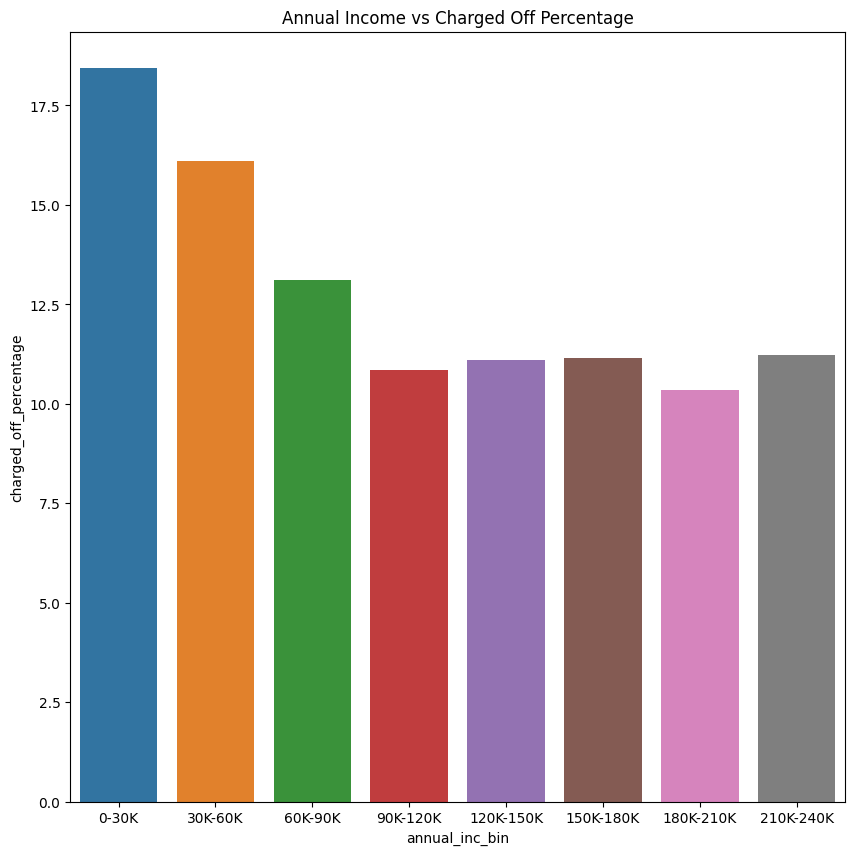

In [83]:
#plotting the bar plot for annual income bin and charged off percentage
plt.figure(figsize=(10,10))
sns.barplot(y='charged_off_percentage', x=status_vs_income_pivot.index, data=status_vs_income_pivot)
plt.title('Annual Income vs Charged Off Percentage')
plt.show()

Observation : The charge off rate is higher for the lower annual income group. Borrowers with higher annual income are more likely to pay back the loan in full.

Interest Rate vs Loan Status

In [84]:
#creating pivot table for loan status and interest rate bin
status_vs_int_pivot = loan_df.pivot_table(index='int_rate_bin', columns='loan_status', values='int_rate', aggfunc='count')

#adding the column for total
status_vs_int_pivot['total'] = status_vs_int_pivot['Charged Off'] + status_vs_int_pivot['Fully Paid']

#adding the percentage of charged off and fully paid
status_vs_int_pivot['charged_off_percentage'] = (status_vs_int_pivot['Charged Off']/status_vs_int_pivot['total'])*100
status_vs_int_pivot['fully_paid_percentage'] = (status_vs_int_pivot['Fully Paid']/status_vs_int_pivot['total'])*100

status_vs_int_pivot

loan_status,Charged Off,Fully Paid,total,charged_off_percentage,fully_paid_percentage
int_rate_bin,,,,,
5-10%,825,11402,12227,6.747362,93.252638
10-15%,2694,15404,18098,14.885623,85.114377
15-20%,1775,5349,7124,24.915778,75.084222
20-25%,290,452,742,39.083558,60.916442


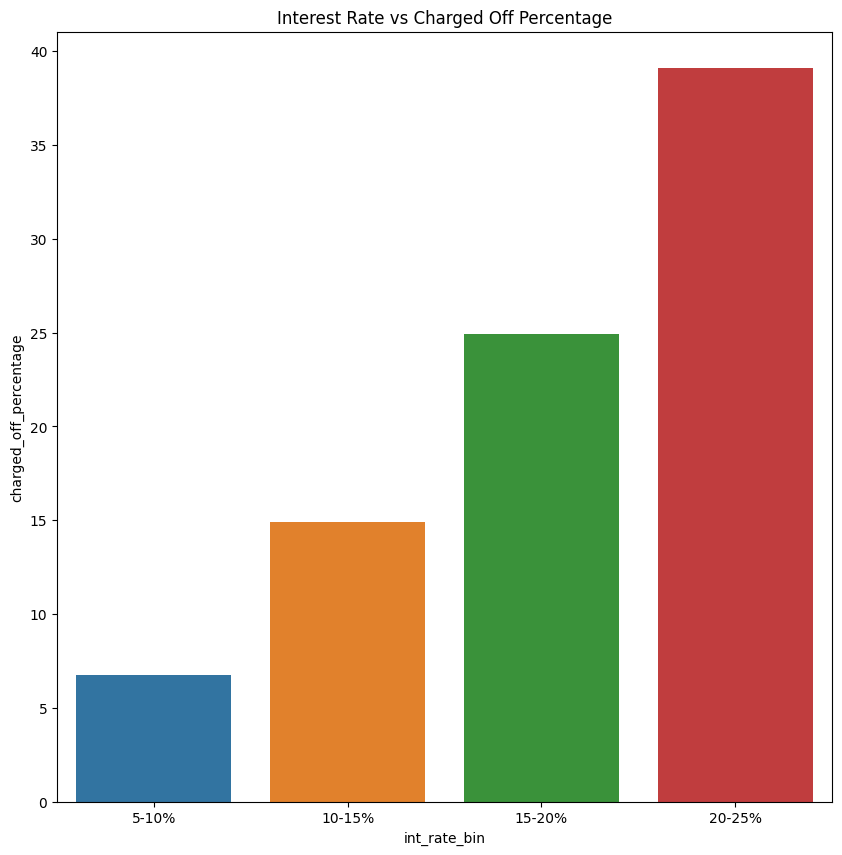

In [85]:
#plotting the bar plot for interest rate bin and charged off percentage
plt.figure(figsize=(10,10))
sns.barplot(y='charged_off_percentage', x=status_vs_int_pivot.index, data=status_vs_int_pivot)
plt.title('Interest Rate vs Charged Off Percentage')
plt.show()

Observations: Higher interest rate is associated with higher charged off percentage. Loans with higher interest rates are more likely to default.

Grade vs Loan Status

In [86]:
#creating pivot table for loan status and grade
status_vs_grade_pivot = loan_df.pivot_table(index='grade', columns='loan_status', values='int_rate', aggfunc='count')

#adding the column for total
status_vs_grade_pivot['total'] = status_vs_grade_pivot['Charged Off'] + status_vs_grade_pivot['Fully Paid']

#adding the percentage of charged off and fully paid
status_vs_grade_pivot['charged_off_percentage'] = (status_vs_grade_pivot['Charged Off']/status_vs_grade_pivot['total'])*100
status_vs_grade_pivot['fully_paid_percentage'] = (status_vs_grade_pivot['Fully Paid']/status_vs_grade_pivot['total'])*100

status_vs_grade_pivot

loan_status,Charged Off,Fully Paid,total,charged_off_percentage,fully_paid_percentage
grade,,,,,
A,601,9376,9977,6.023855,93.976145
B,1414,10167,11581,12.209654,87.790346
C,1342,6411,7753,17.309429,82.690571
D,1112,3915,5027,22.120549,77.879451
E,704,1906,2610,26.973180,73.026820
F,312,642,954,32.704403,67.295597
G,99,190,289,34.256055,65.743945


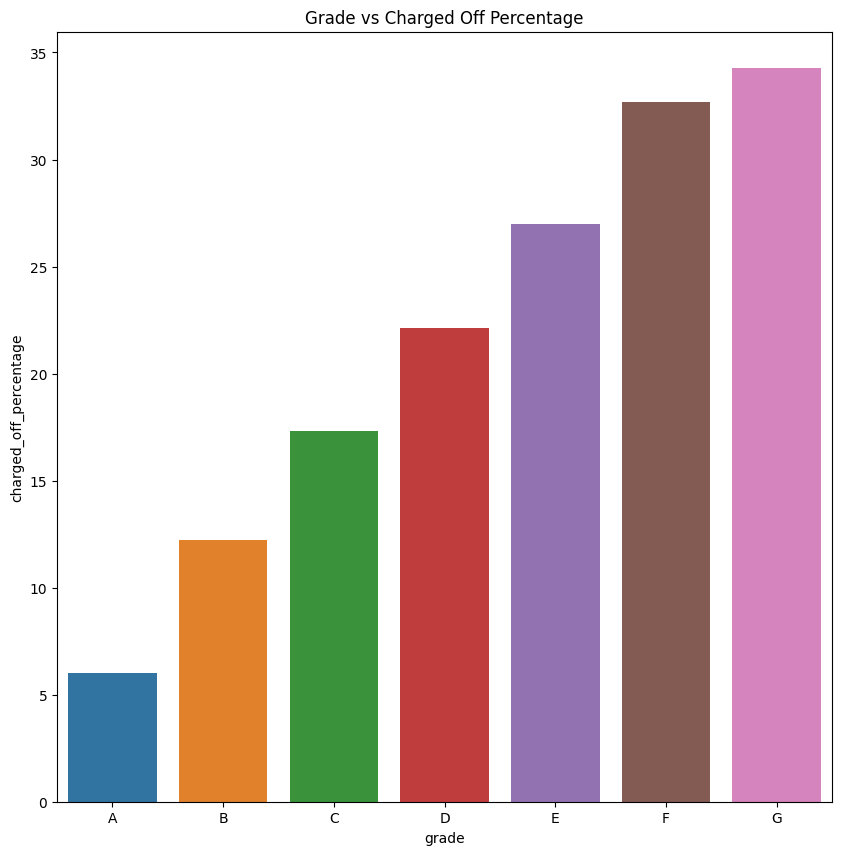

In [87]:
#plotting the bar plot for grade and charged off percentage
plt.figure(figsize=(10,10))
sns.barplot(y='charged_off_percentage', x=status_vs_grade_pivot.index, data=status_vs_grade_pivot)
plt.title('Grade vs Charged Off Percentage')
plt.show()

Observations: Grade G has the highest charged off percentage. Grade A has the lowest charged off percentage. This is in line with the interest rate vs loan status plot as the interest rate is categorized into grades.

sub_grade vs Loan Status

In [88]:
#creating pivot table for loan status and sub grade
status_vs_subgrade_pivot = loan_df.pivot_table(index='sub_grade', columns='loan_status', values='int_rate', aggfunc='count')

#adding the column for total
status_vs_subgrade_pivot['total'] = status_vs_subgrade_pivot['Charged Off'] + status_vs_subgrade_pivot['Fully Paid']

#adding the percentage of charged off and fully paid
status_vs_subgrade_pivot['charged_off_percentage'] = (status_vs_subgrade_pivot['Charged Off']/status_vs_subgrade_pivot['total'])*100
status_vs_subgrade_pivot['fully_paid_percentage'] = (status_vs_subgrade_pivot['Fully Paid']/status_vs_subgrade_pivot['total'])*100

status_vs_subgrade_pivot

loan_status,Charged Off,Fully Paid,total,charged_off_percentage,fully_paid_percentage
sub_grade,,,,,
A1,30,1102,1132,2.650177,97.349823
A2,74,1425,1499,4.936624,95.063376
A3,103,1696,1799,5.725403,94.274597
A4,178,2676,2854,6.236861,93.763139
A5,216,2477,2693,8.020795,91.979205
B1,170,1616,1786,9.518477,90.481523
B2,225,1753,1978,11.375126,88.624874
B3,335,2457,2792,11.998567,88.001433
B4,328,2097,2425,13.525773,86.474227


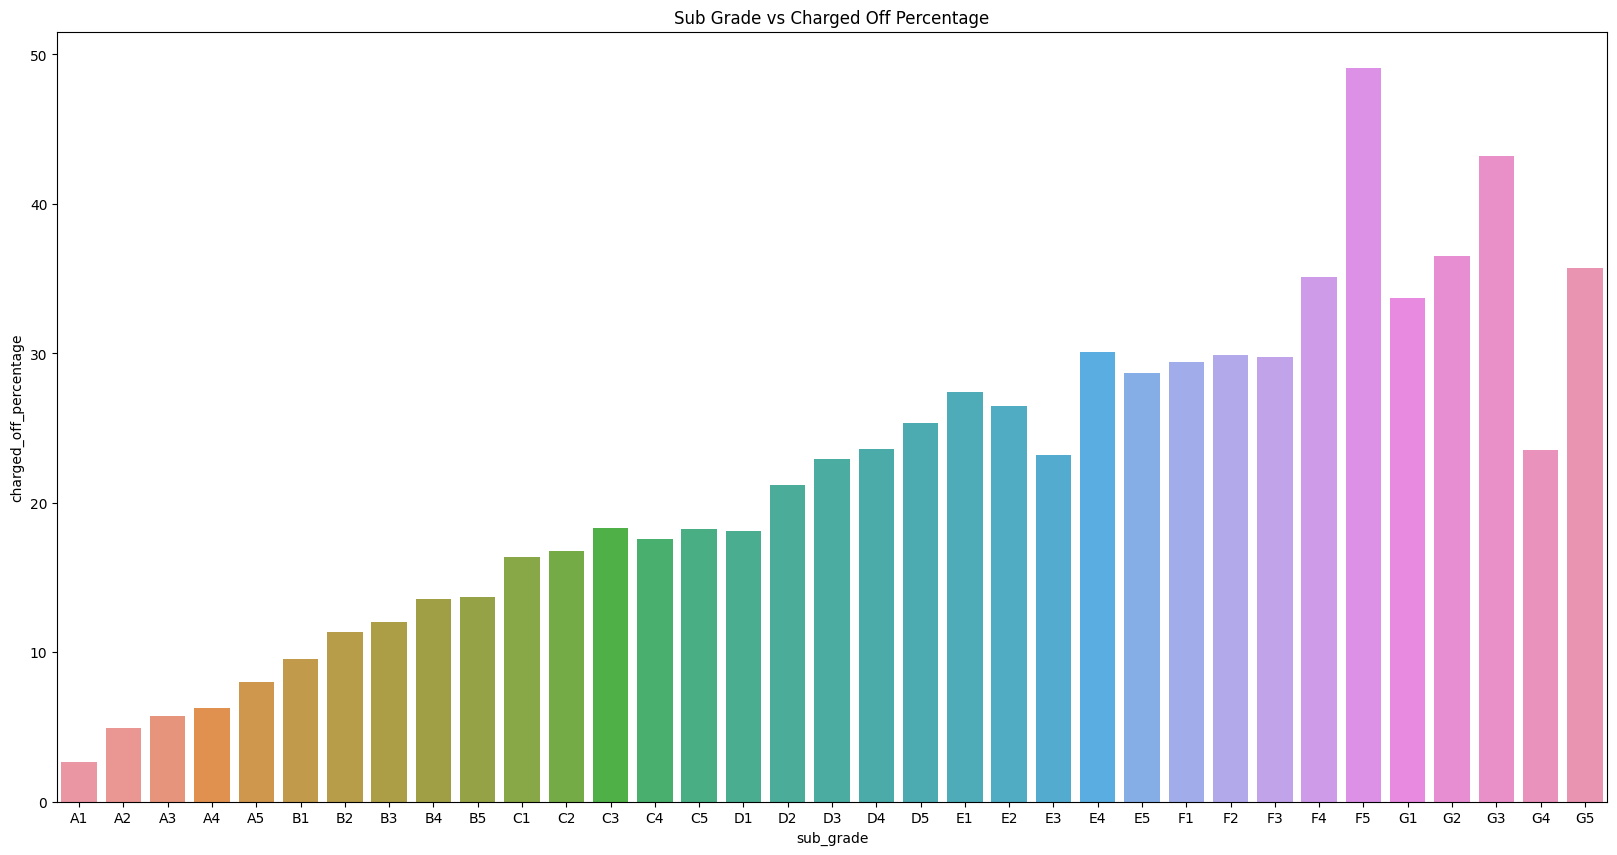

In [89]:
#plotting the bar plot for sub grade and charged off percentage
plt.figure(figsize=(20,10))
sns.barplot(y='charged_off_percentage', x=status_vs_subgrade_pivot.index, data=status_vs_subgrade_pivot)
plt.title('Sub Grade vs Charged Off Percentage')
plt.show()

Observation : The charged off percentage increases from sub grade A1 to G5. The sub grade F5 has the highest charged off percentage followed by G3 and G2 sub grades.

Debt to Income Ratio vs Loan Status

In [90]:
#creating pivot table for loan status and debt to income ratio bin
status_vs_dti_pivot = loan_df.pivot_table(index='dti_bin', columns='loan_status', values='dti', aggfunc='count')

#adding the column for total
status_vs_dti_pivot['total'] = status_vs_dti_pivot['Charged Off'] + status_vs_dti_pivot['Fully Paid']

#adding the percentage of charged off and fully paid
status_vs_dti_pivot['charged_off_percentage'] = (status_vs_dti_pivot['Charged Off']/status_vs_dti_pivot['total'])*100
status_vs_dti_pivot['fully_paid_percentage'] = (status_vs_dti_pivot['Fully Paid']/status_vs_dti_pivot['total'])*100

status_vs_dti_pivot

loan_status,Charged Off,Fully Paid,total,charged_off_percentage,fully_paid_percentage
dti_bin,,,,,
0-5%,580,4157,4737,12.244036,87.755964
5-10%,996,6749,7745,12.859910,87.140090
10-15%,1392,8164,9556,14.566764,85.433236
15-20%,1385,7399,8784,15.767304,84.232696
20-25%,1116,5455,6571,16.983716,83.016284
25-30%,87,535,622,13.987138,86.012862


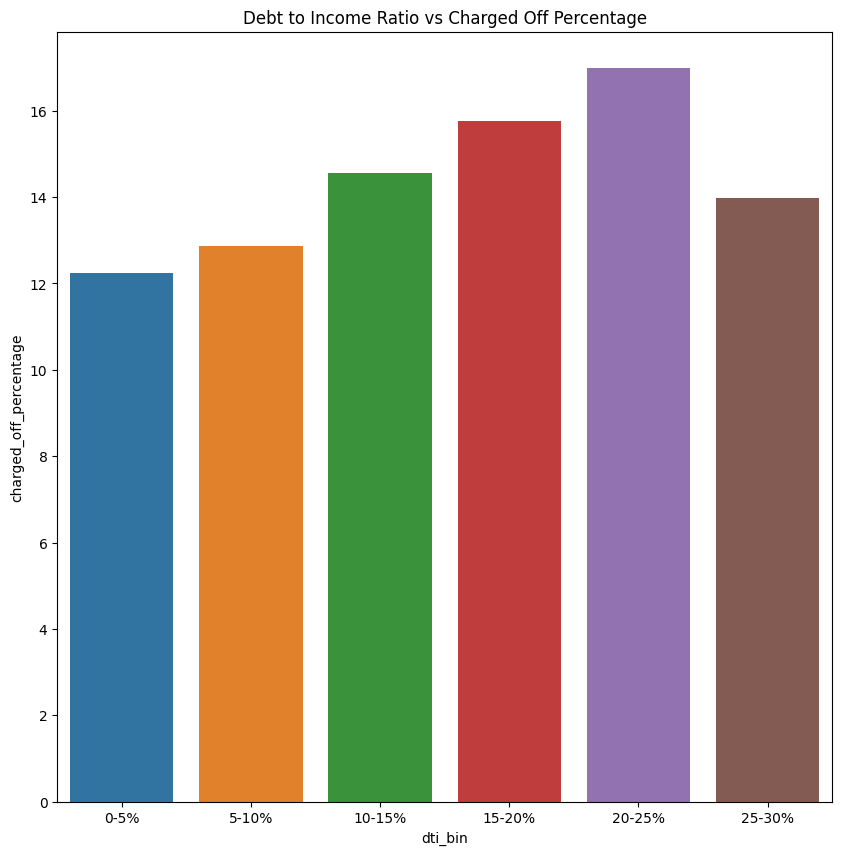

In [91]:
#plotting the bar plot for debt to income ratio bin and charged off percentage
plt.figure(figsize=(10,10))
sns.barplot(y='charged_off_percentage', x=status_vs_dti_pivot.index, data=status_vs_dti_pivot)
plt.title('Debt to Income Ratio vs Charged Off Percentage')
plt.show()

Observation : There is no significant difference in the charged off percentage for different debt to income ratio groups. There is a slight increase in charged off percentage with increase in debt to income ratio.

Revolving Utilization vs Loan Status

In [92]:
#creating pivot table for loan status and revol utilization bin
status_vs_revol_pivot = loan_df.pivot_table(index='revol_util_bin', columns='loan_status', values='revol_util', aggfunc='count')

#adding the column for total
status_vs_revol_pivot['total'] = status_vs_revol_pivot['Charged Off'] + status_vs_revol_pivot['Fully Paid']

#adding the percentage of charged off and fully paid
status_vs_revol_pivot['charged_off_percentage'] = (status_vs_revol_pivot['Charged Off']/status_vs_revol_pivot['total'])*100
status_vs_revol_pivot['fully_paid_percentage'] = (status_vs_revol_pivot['Fully Paid']/status_vs_revol_pivot['total'])*100

status_vs_revol_pivot

loan_status,Charged Off,Fully Paid,total,charged_off_percentage,fully_paid_percentage
revol_util_bin,,,,,
0-20%,620,6117,6737,9.202909,90.797091
20-40%,913,6727,7640,11.950262,88.049738
40-60%,1228,7108,8336,14.731286,85.268714
60-80%,1344,6603,7947,16.912042,83.087958
80-100%,1321,5227,6548,20.174099,79.825901


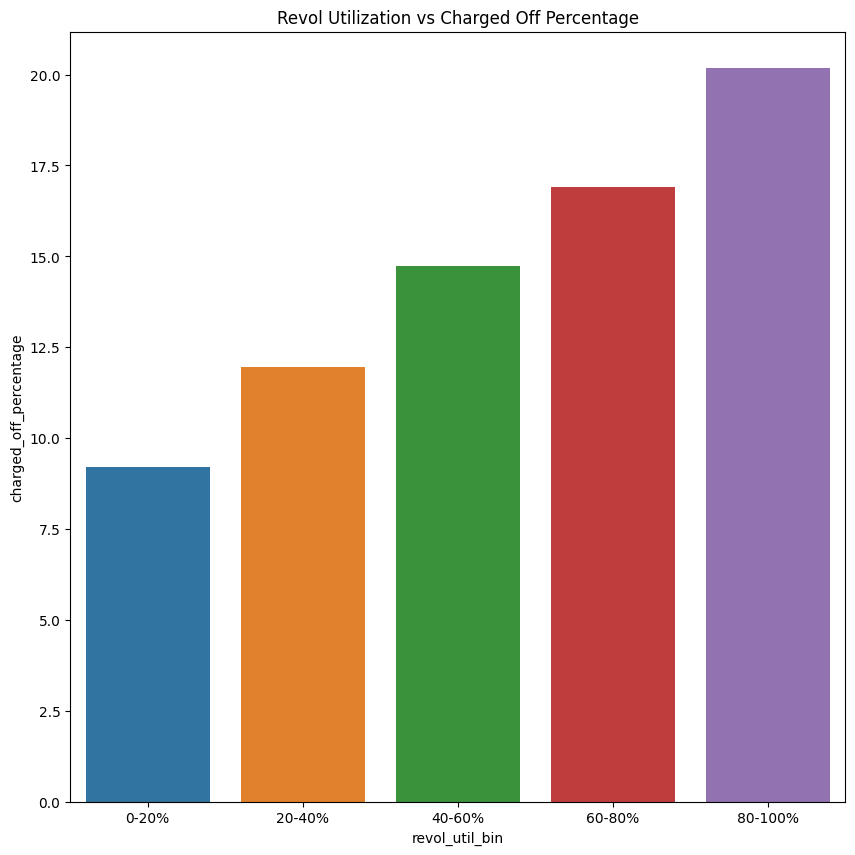

In [93]:
#plotting the bar plot for revol utilization bin and charged off percentage
plt.figure(figsize=(10,10))
sns.barplot(y='charged_off_percentage', x=status_vs_revol_pivot.index, data=status_vs_revol_pivot)
plt.title('Revol Utilization vs Charged Off Percentage')
plt.show()

Observation : The charged off percentage is higher for the borrowers with higher revolving utilization. This implies that the borrowers with higher revolving utilization are more likely to default on their loans. 

pub_rec_bankruptcies vs Loan Status

In [94]:
#creating pivot table for loan status and pub_rec_bankruptcies
status_vs_pub_rec_pivot = loan_df.pivot_table(index='pub_rec_bankruptcies', columns='loan_status', values='int_rate', aggfunc='count')

#adding the column for total
status_vs_pub_rec_pivot['total'] = status_vs_pub_rec_pivot['Charged Off'] + status_vs_pub_rec_pivot['Fully Paid']

#adding the percentage of charged off and fully paid
status_vs_pub_rec_pivot['charged_off_percentage'] = (status_vs_pub_rec_pivot['Charged Off']/status_vs_pub_rec_pivot['total'])*100
status_vs_pub_rec_pivot['fully_paid_percentage'] = (status_vs_pub_rec_pivot['Fully Paid']/status_vs_pub_rec_pivot['total'])*100

status_vs_pub_rec_pivot

loan_status,Charged Off,Fully Paid,total,charged_off_percentage,fully_paid_percentage
pub_rec_bankruptcies,,,,,
0.0,5217,31336,36553,14.272426,85.727574
1.0,365,1268,1633,22.351500,77.648500
2.0,2,3,5,40.000000,60.000000


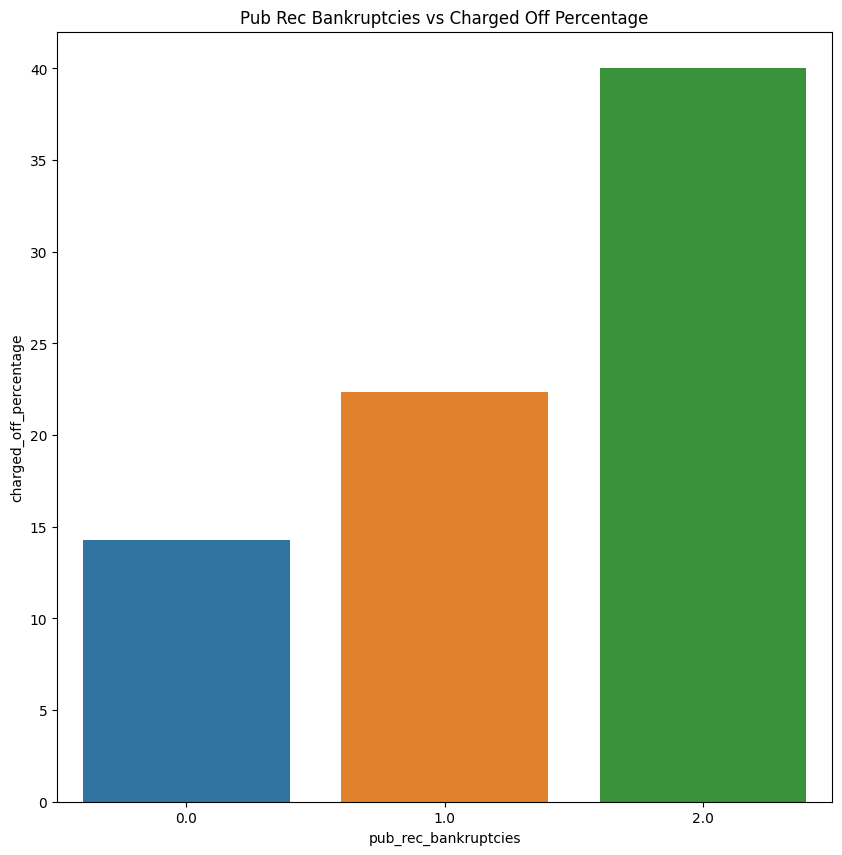

In [95]:
#plotting the bar plot for pub_rec_bankruptcies and charged off percentage
plt.figure(figsize=(10,10))
sns.barplot(y='charged_off_percentage', x=status_vs_pub_rec_pivot.index, data=status_vs_pub_rec_pivot)
plt.title('Pub Rec Bankruptcies vs Charged Off Percentage')
plt.show()

Observation : Charged off percentage increases with increase in number of public record bankruptcies. This implies that the borrowers with higher number of public record bankruptcies are more likely to default on their loans.

Emp_length vs Loan Status

In [96]:
#creating pivot table for loan status and emp_length
status_vs_emp_length_pivot = loan_df.pivot_table(index='emp_length', columns='loan_status', values='int_rate', aggfunc='count')

#adding the column for total
status_vs_emp_length_pivot['total'] = status_vs_emp_length_pivot['Charged Off'] + status_vs_emp_length_pivot['Fully Paid']

#adding the percentage of charged off and fully paid
status_vs_emp_length_pivot['charged_off_percentage'] = (status_vs_emp_length_pivot['Charged Off']/status_vs_emp_length_pivot['total'])*100
status_vs_emp_length_pivot['fully_paid_percentage'] = (status_vs_emp_length_pivot['Fully Paid']/status_vs_emp_length_pivot['total'])*100

status_vs_emp_length_pivot

loan_status,Charged Off,Fully Paid,total,charged_off_percentage,fully_paid_percentage
emp_length,,,,,
0,635,3844,4479,14.177272,85.822728
1,455,2688,3143,14.476615,85.523385
2,561,3684,4245,13.215548,86.784452
3,551,3426,3977,13.854664,86.145336
4,456,2859,3315,13.755656,86.244344
5,456,2712,3168,14.393939,85.606061
6,305,1846,2151,14.179451,85.820549
7,262,1435,1697,15.439010,84.560990
8,203,1216,1419,14.305849,85.694151


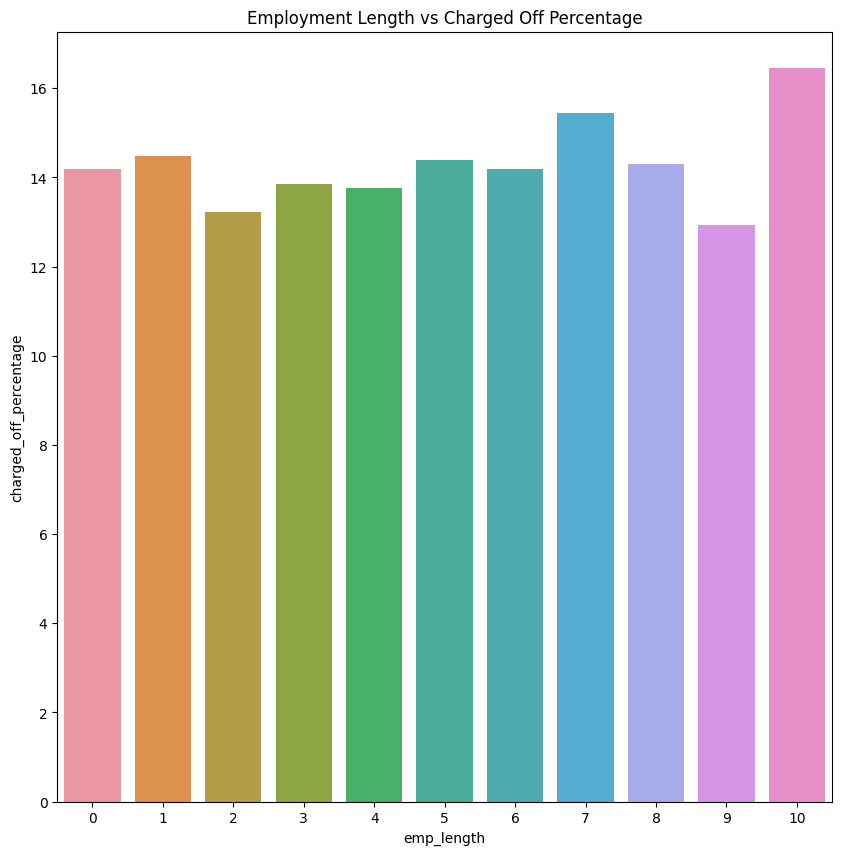

In [97]:
#plotting the bar plot for emp_length and charged off percentage
plt.figure(figsize=(10,10))
sns.barplot(y='charged_off_percentage', x=status_vs_emp_length_pivot.index, data=status_vs_emp_length_pivot)
plt.title('Employment Length vs Charged Off Percentage')
plt.show()

Observation: The chared off percentage is lowest for the borrowers with emp_length of 9 years and highest for the borrowers with emp_length of 10+ years. There is no significant difference in the charged off percentage for the borrowers with emp_length of 0 to 8 years. Hence we can conclude that the emp_length is not a good predictor for loan_status.

Home Ownership vs Loan Status

In [98]:
#creating pivot table for loan status and home ownership
status_vs_home_ownership_pivot = loan_df.pivot_table(index='home_ownership', columns='loan_status', values='int_rate', aggfunc='count')

#adding the column for total
status_vs_home_ownership_pivot['total'] = status_vs_home_ownership_pivot['Charged Off'] + status_vs_home_ownership_pivot['Fully Paid']

#adding the percentage of charged off and fully paid
status_vs_home_ownership_pivot['charged_off_percentage'] = (status_vs_home_ownership_pivot['Charged Off']/status_vs_home_ownership_pivot['total'])*100
status_vs_home_ownership_pivot['fully_paid_percentage'] = (status_vs_home_ownership_pivot['Fully Paid']/status_vs_home_ownership_pivot['total'])*100

status_vs_home_ownership_pivot

loan_status,Charged Off,Fully Paid,total,charged_off_percentage,fully_paid_percentage
home_ownership,,,,,
MORTGAGE,2302,14446,16748,13.744925,86.255075
OTHER,18,81,99,18.181818,81.818182
OWN,440,2507,2947,14.930438,85.069562
RENT,2824,15573,18397,15.350329,84.649671


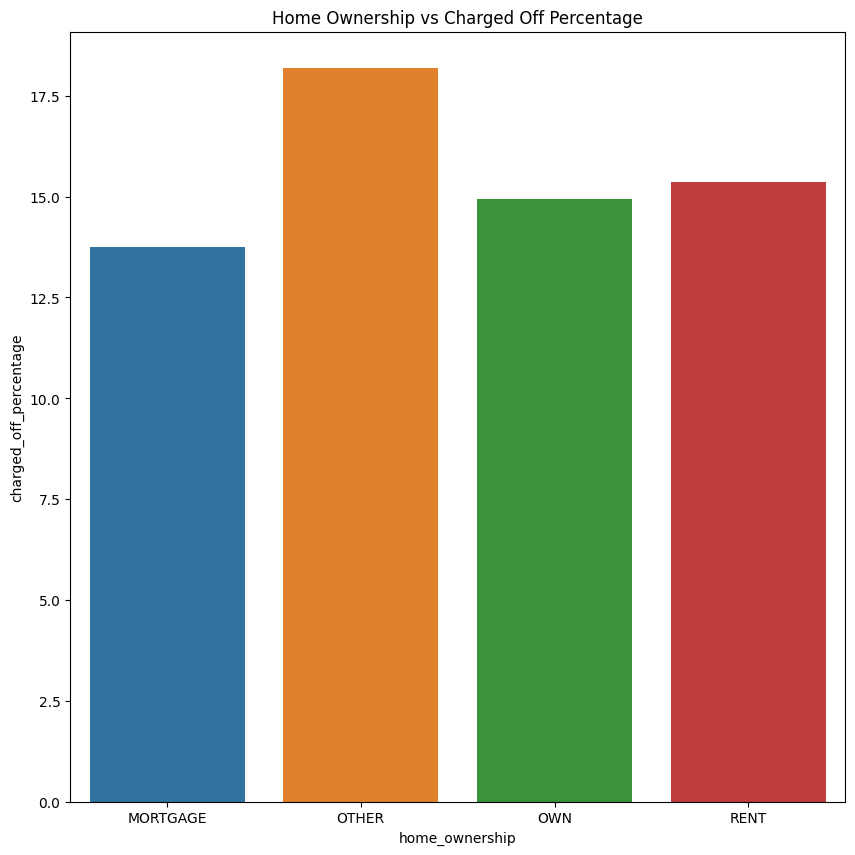

In [99]:
#plotting the bar plot for home ownership and charged off percentage
plt.figure(figsize=(10,10))
sns.barplot(y='charged_off_percentage', x=status_vs_home_ownership_pivot.index, data=status_vs_home_ownership_pivot)
plt.title('Home Ownership vs Charged Off Percentage')
plt.show()

Observation : The charged off percentage is highest for the borrowers with home ownership type of Other while there is no significant difference in the charged off percentage for the borrowers with home ownership type of Rent, Mortgage and Own.

Purpose vs Loan Status

In [100]:
#creating pivot table for loan status and purpose
status_vs_purpose_pivot = loan_df.pivot_table(index='purpose', columns='loan_status', values='int_rate', aggfunc='count')

#adding the column for total
status_vs_purpose_pivot['total'] = status_vs_purpose_pivot['Charged Off'] + status_vs_purpose_pivot['Fully Paid']

#adding the percentage of charged off and fully paid
status_vs_purpose_pivot['charged_off_percentage'] = (status_vs_purpose_pivot['Charged Off']/status_vs_purpose_pivot['total'])*100
status_vs_purpose_pivot['fully_paid_percentage'] = (status_vs_purpose_pivot['Fully Paid']/status_vs_purpose_pivot['total'])*100

status_vs_purpose_pivot

loan_status,Charged Off,Fully Paid,total,charged_off_percentage,fully_paid_percentage
purpose,,,,,
car,160,1331,1491,10.731053,89.268947
credit_card,537,4450,4987,10.767997,89.232003
debt_consolidation,2752,15165,17917,15.359714,84.640286
educational,55,268,323,17.027864,82.972136
home_improvement,338,2459,2797,12.084376,87.915624
house,58,299,357,16.246499,83.753501
major_purchase,220,1909,2129,10.333490,89.666510
medical,106,568,674,15.727003,84.272997
moving,91,479,570,15.964912,84.035088


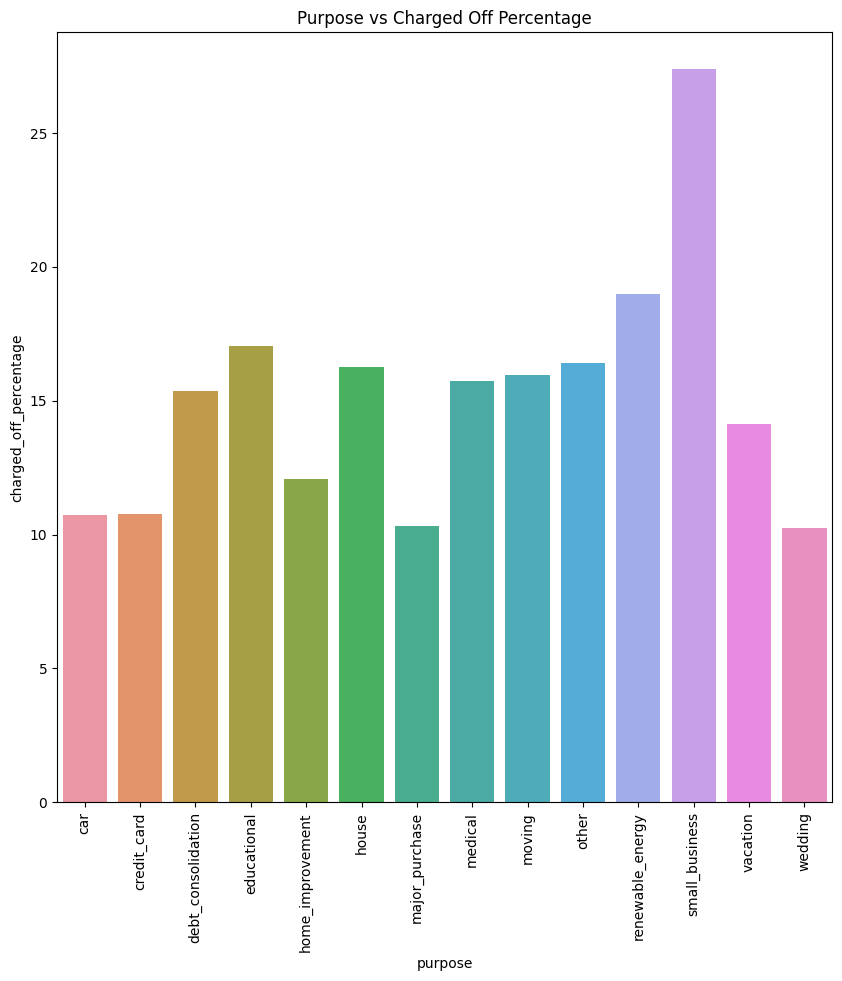

In [101]:
#plotting the bar plot for purpose and charged off percentage
plt.figure(figsize=(10,10))
sns.barplot(y='charged_off_percentage', x=status_vs_purpose_pivot.index, data=status_vs_purpose_pivot)
plt.title('Purpose vs Charged Off Percentage')
plt.xticks(rotation=90)
plt.show()

Observation : The charged off percentage is highest for the borrowers with purpose of small business followed by renewable energy and educational. The charged off percentage is relatively low for the borrowers with purpose of debt consolidation, credit card, major purchase and wedding. This implies that the borrowers with purpose of small business, renewable energy and educational are more likely to default on their loans.

addr_state vs Loan Status

In [102]:
#creating pivot table for loan status and addr_state
status_vs_addr_state_pivot = loan_df.pivot_table(index='addr_state', columns='loan_status', values='int_rate', aggfunc='count')

#adding the column for total
status_vs_addr_state_pivot['total'] = status_vs_addr_state_pivot['Charged Off'] + status_vs_addr_state_pivot['Fully Paid']

#adding the percentage of charged off and fully paid
status_vs_addr_state_pivot['charged_off_percentage'] = (status_vs_addr_state_pivot['Charged Off']/status_vs_addr_state_pivot['total'])*100
status_vs_addr_state_pivot['fully_paid_percentage'] = (status_vs_addr_state_pivot['Fully Paid']/status_vs_addr_state_pivot['total'])*100

status_vs_addr_state_pivot

loan_status,Charged Off,Fully Paid,total,charged_off_percentage,fully_paid_percentage
addr_state,,,,,
AK,14.0,63.0,77.0,18.181818,81.818182
AL,54.0,378.0,432.0,12.500000,87.500000
AR,27.0,208.0,235.0,11.489362,88.510638
AZ,121.0,718.0,839.0,14.421931,85.578069
CA,1116.0,5766.0,6882.0,16.216216,83.783784
CO,97.0,659.0,756.0,12.830688,87.169312
CT,94.0,618.0,712.0,13.202247,86.797753
DC,15.0,196.0,211.0,7.109005,92.890995
DE,12.0,101.0,113.0,10.619469,89.380531


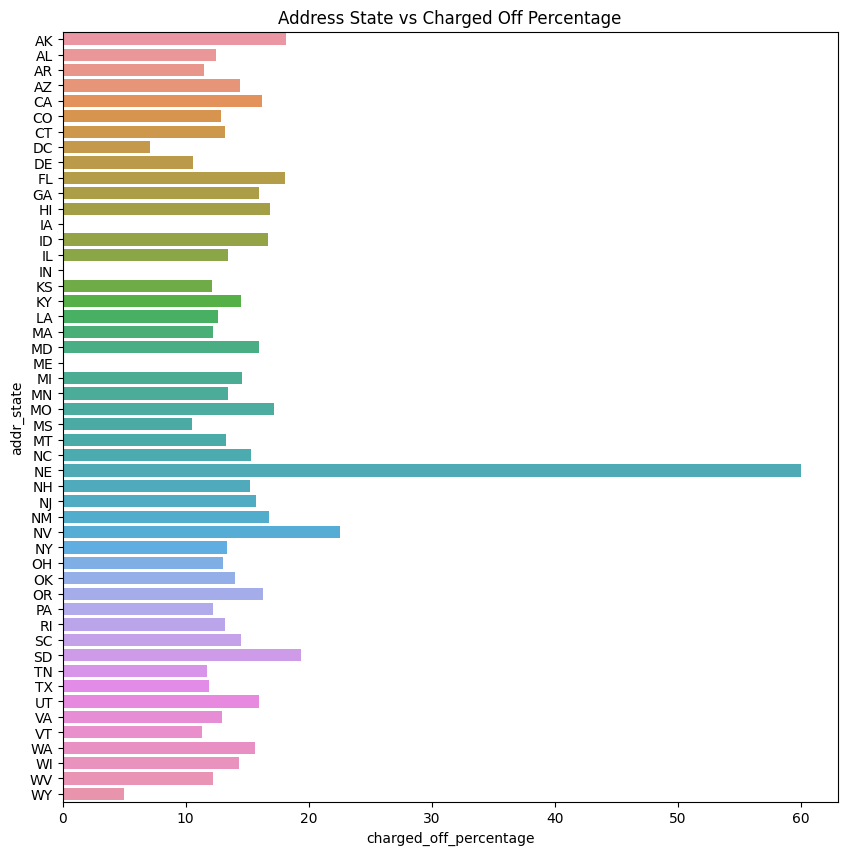

In [103]:
#plotting the bar plot for addr_state and charged off percentage
plt.figure(figsize=(10,10))
sns.barplot(x='charged_off_percentage', y=status_vs_addr_state_pivot.index, data=status_vs_addr_state_pivot)
plt.title('Address State vs Charged Off Percentage')
plt.show()


Observation : The charged off percentage is highest for State NE however it has very low number of observations. CA and FL state have higher charged off percentage with good number of observations compared to other states. There is no significant difference in the charged off percentage for the borrowers with addr_state of other states. Hence we can conclude that the addr_state is not a good predictor for loan_status.

issue month vs Loan Status

In [104]:
#creating pivot table for loan status and issue month
status_vs_issue_month_pivot = loan_df.pivot_table(index='issue_month', columns='loan_status', values='int_rate', aggfunc='count')

#adding the column for total
status_vs_issue_month_pivot['total'] = status_vs_issue_month_pivot['Charged Off'] + status_vs_issue_month_pivot['Fully Paid']

#adding the percentage of charged off and fully paid
status_vs_issue_month_pivot['charged_off_percentage'] = (status_vs_issue_month_pivot['Charged Off']/status_vs_issue_month_pivot['total'])*100
status_vs_issue_month_pivot['fully_paid_percentage'] = (status_vs_issue_month_pivot['Fully Paid']/status_vs_issue_month_pivot['total'])*100

status_vs_issue_month_pivot

loan_status,Charged Off,Fully Paid,total,charged_off_percentage,fully_paid_percentage
issue_month,,,,,
1,317,2037,2354,13.466440,86.533560
2,288,2049,2337,12.323492,87.676508
3,344,2315,2659,12.937194,87.062806
4,368,2440,2808,13.105413,86.894587
5,462,2425,2887,16.002771,83.997229
6,480,2666,3146,15.257470,84.742530
7,475,2846,3321,14.302921,85.697079
8,465,2898,3363,13.826940,86.173060
9,545,2918,3463,15.737800,84.262200


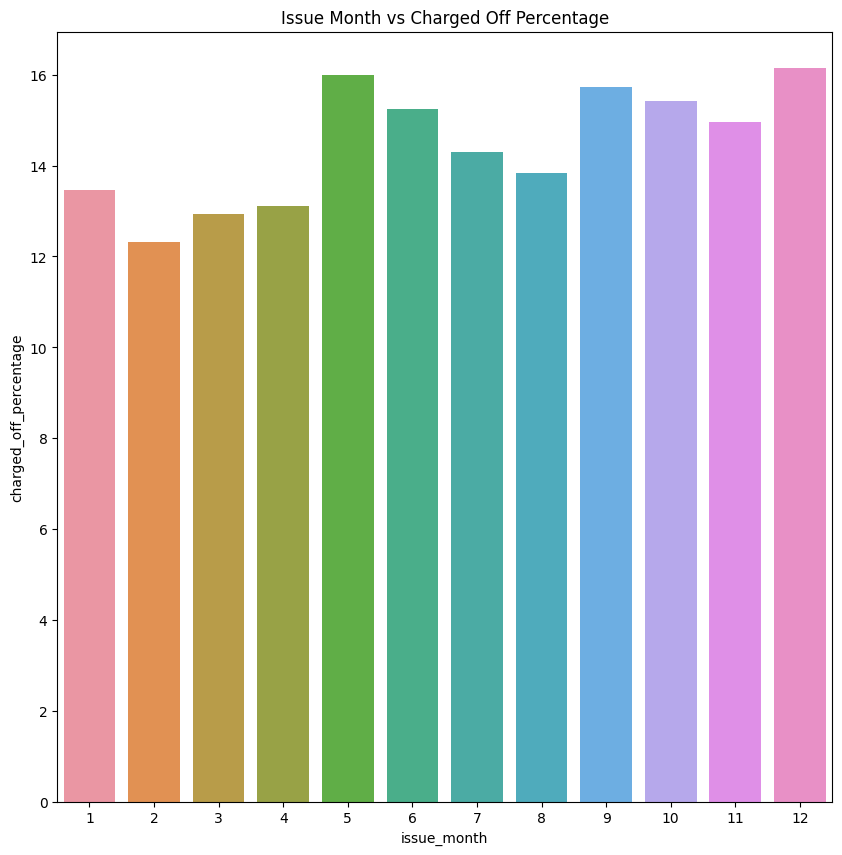

In [105]:
#plotting the bar plot for issue month and charged off percentage
plt.figure(figsize=(10,10))
sns.barplot(y='charged_off_percentage', x=status_vs_issue_month_pivot.index, data=status_vs_issue_month_pivot)
plt.title('Issue Month vs Charged Off Percentage')
plt.show()

Observation : December and May month have high charged off percentage while Loans taken in January, February, March, April have low charged off percentage. This implies that the borrowers who take loan in first 4 months of the year are more likely to pay back the loan in full.

Verification Status vs Loan Status

In [106]:
#creating pivot table for loan status and verification status
status_vs_verification_status_pivot = loan_df.pivot_table(index='verification_status', columns='loan_status', values='int_rate', aggfunc='count')

#adding the column for total
status_vs_verification_status_pivot['total'] = status_vs_verification_status_pivot['Charged Off'] + status_vs_verification_status_pivot['Fully Paid']

#adding the percentage of charged off and fully paid
status_vs_verification_status_pivot['charged_off_percentage'] = (status_vs_verification_status_pivot['Charged Off']/status_vs_verification_status_pivot['total'])*100
status_vs_verification_status_pivot['fully_paid_percentage'] = (status_vs_verification_status_pivot['Fully Paid']/status_vs_verification_status_pivot['total'])*100

status_vs_verification_status_pivot

loan_status,Charged Off,Fully Paid,total,charged_off_percentage,fully_paid_percentage
verification_status,,,,,
Not Verified,2130,14474,16604,12.828234,87.171766
Source Verified,1422,8134,9556,14.880703,85.119297
Verified,2032,9999,12031,16.889702,83.110298


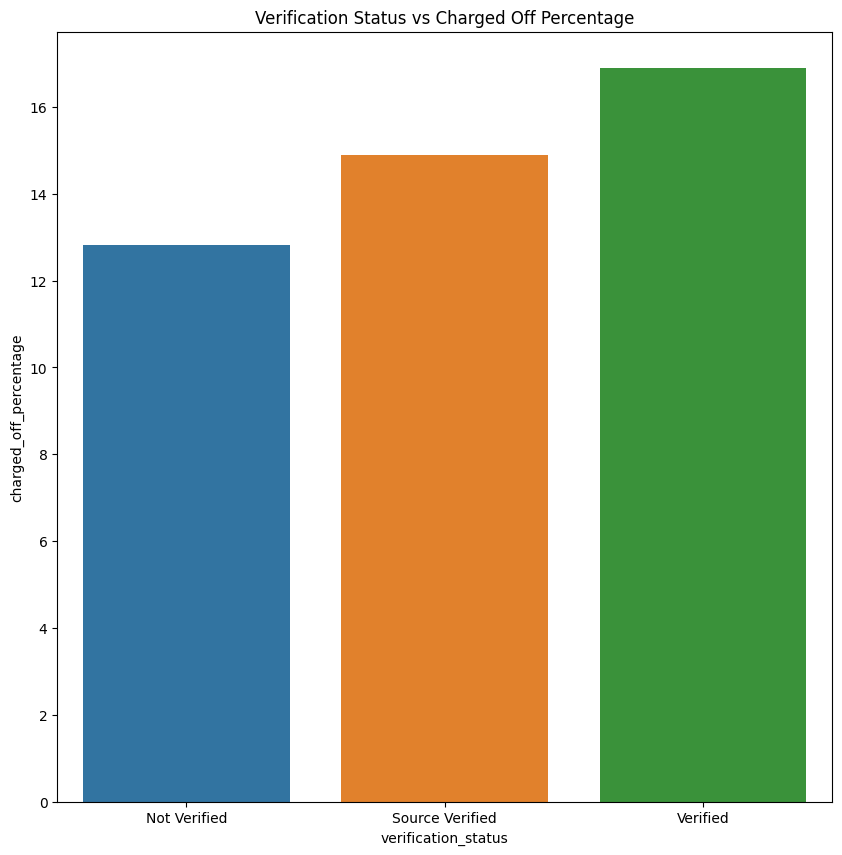

In [107]:
#plotting the bar plot for verification status and charged off percentage
plt.figure(figsize=(10,10))
sns.barplot(y='charged_off_percentage', x=status_vs_verification_status_pivot.index, data=status_vs_verification_status_pivot)
plt.title('Verification Status vs Charged Off Percentage')
plt.show()

Observation : The charged off percentage is higher for the borrowers with verification status of Verified. This implies that the borrowers with verification status of Verified are more likely to default on their loans.

## Final Observations

Below are the conditions which are associated with higher charged off percentage:

1. Higher loan amount - Borrowers who take out higher loan amounts are more likely to default on their loans and less likely to pay them off in full. Specifically loan amount above 15K-20K and beyond.

2. Lower annual income - Borrowers with lower annual income are more likely to default on their loans. Annual income below 90K is associated with higher charged off percentage.

3. Higher interest rate - Loans with higher interest rates are more likely to default. Higher interest rate is associated with higher charged off percentage. As loan amount increases, interest rate also increases. 

4. Higher grade and sub grade - Grade G has the highest charged off percentage. Grade A has the lowest charged off percentage. This is in line with the interest rate vs loan status plot as the interest rate is categorized into grades. The charged off percentage increases from sub grade A1 to G5. The sub grade F5 has the highest charged off percentage followed by G3 and G2 sub grades. This implies that the borrowers with higher grade and sub grade are more likely to default on their loans.

5. Higher debt to income ratio - Higher debt to income ratio is associated with higher charged off percentage. There is a slight increase in charged off percentage with increase in debt to income ratio. 

6. Higher revolving utilization - The borrowers with higher revolving utilization are more likely to default on their loans. The charged off percentage is higher for the borrowers with higher revolving utilization. Significantly higher charged off percentage is observed for the borrowers with revolving utilization above 80%.

7. Higher number of public record bankruptcies - The borrowers with higher number of public record bankruptcies are more likely to default on their loans. There is high likelihood of bororower defaulting since the borrower has already defaulted on his previous loans.

8. Home ownership type of Other - The charged off percentage is highest for the borrowers with home ownership type of Other. This implies that the borrowers with home ownership type of Other are more likely to default on their loans.

9. Purpose of small business, renewable energy and educational - The charged off percentage is highest for the borrowers with purpose of small business followed by renewable energy and educational. Also the small business tend to have higher interest rate and loan amount than the other purposes. This shows that there is higher risk associated with small business as they are more likely to default on their loans.

10. Issue month of December and May - December and May month have high charged off percentage while Loans taken in January, February, March, April have low charged off percentage. This implies that the borrowers who take loan in first 4 months of the year are more likely to pay back the loan in full.

11. Verification status of Verified - The charged off percentage is higher for the borrowers with verification status of Verified. It is observed that borrowers with verification status of Verified have higher interest rate and loan amount. This implies that the borrowers with verification status of Verified are more likely to default on their loans.

12. Term of 60 months - The charged off percentage is higher for the borrowers with term of 60 months. This implies that the borrowers with term of 60 months are more likely to default on their loans.